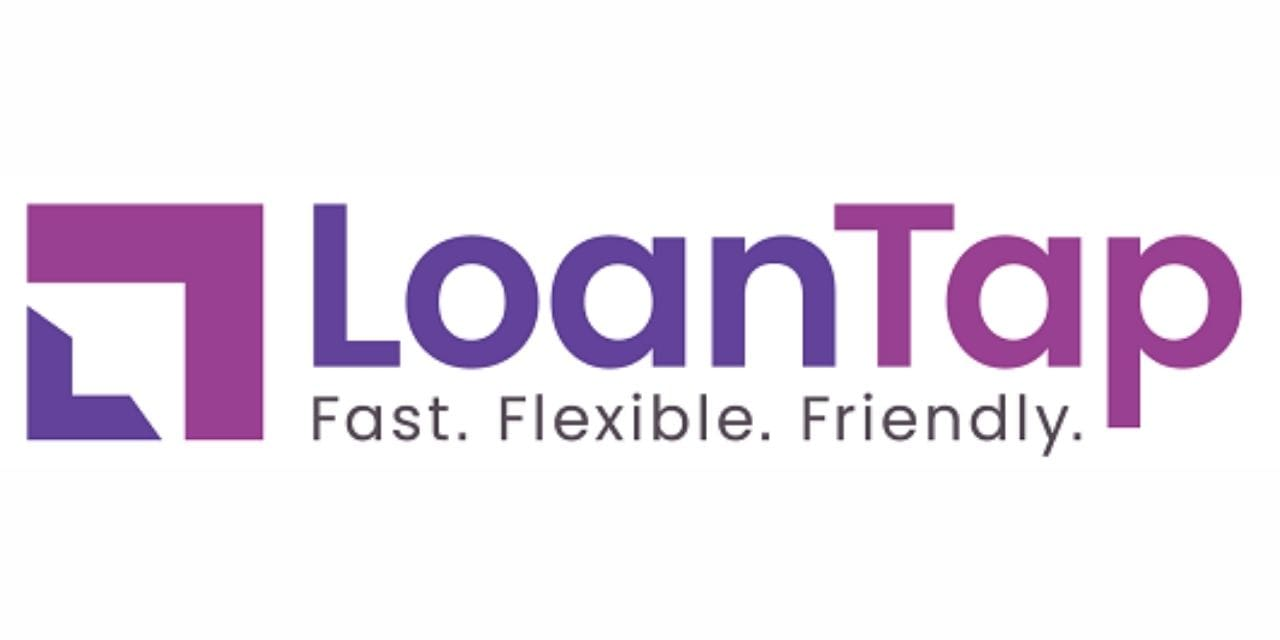

> # <b><font color = "Purple">LoanTap - Logistic Regression</font> </b>

---

  
>>**Analyst**: SYED ZAHEER ABBAS

>>**Email**: [syedzaheer.c@gmail.com](mailto:syedzaheer.c@email.com)  

>>**LinkedIn**: [SYED ZAHEER ABBAS ](https://www.linkedin.com/in/syed-z-59386a195/)  

# **About LoanTap**


LoanTap is an online lending platform that offers customized loan products to millennials. It provides quick and flexible credit solutions like Personal Loans, EMI-Free Loans, Overdrafts, and Advance Salary Loans to salaried professionals and small businesses.

#**Problem Statement**



LoanTap wants to automate its Personal Loan approval process using machine learning to predict whether a customer will repay the loan or not. Based on the prediction, the company also aims to suggest suitable repayment terms.

#**Objective**

- Build a classification model to predict loan repayment status (Fully Paid or Charged Off).

- Analyze key factors affecting loan default.

- Provide business recommendations on repayment terms for eligible applicants.

#**Concepts used**



- EDA
- Feature Engineering
- Logistic Regression
- Precission and Recall tradeoff

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score , recall_score ,f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import warnings
warnings.filterwarnings("ignore")


In [3]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/logistic_regression.csv')

In [4]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


#Data Profiling

In [5]:
print(df.head())

   loan_amnt        term  int_rate  installment grade sub_grade  \
0    10000.0   36 months     11.44       329.48     B        B4   
1     8000.0   36 months     11.99       265.68     B        B5   
2    15600.0   36 months     10.49       506.97     B        B3   
3     7200.0   36 months      6.49       220.65     A        A2   
4    24375.0   60 months     17.27       609.33     C        C5   

                 emp_title emp_length home_ownership  annual_inc  ...  \
0                Marketing  10+ years           RENT    117000.0  ...   
1          Credit analyst     4 years       MORTGAGE     65000.0  ...   
2             Statistician   < 1 year           RENT     43057.0  ...   
3          Client Advocate    6 years           RENT     54000.0  ...   
4  Destiny Management Inc.    9 years       MORTGAGE     55000.0  ...   

  open_acc pub_rec revol_bal revol_util total_acc  initial_list_status  \
0     16.0     0.0   36369.0       41.8      25.0                    w   
1     17.0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [7]:
df.shape

(396030, 27)

In [8]:
df.describe(include='object')

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
count,396030,396030,396030,373103,377729,396030,396030,396030,396030,396030,394274,396030,396030,396030,396030
unique,2,7,35,173105,11,6,3,115,2,14,48816,684,2,3,393700
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,Oct-2000,f,INDIVIDUAL,USS Johnson\r\nFPO AE 48052
freq,302005,116018,26655,4389,126041,198348,139563,14846,318357,234507,152472,3017,238066,395319,8


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [10]:
null_details = df.isna().sum() / len(df) * 100
print('\033[1m' + 'Percentages of null' + '\033[0m')
print(null_details.sort_values(ascending = False)[:6])

Percentages of null
mort_acc                9.543469
emp_title               5.789208
emp_length              4.621115
title                   0.443401
pub_rec_bankruptcies    0.135091
revol_util              0.069692
dtype: float64


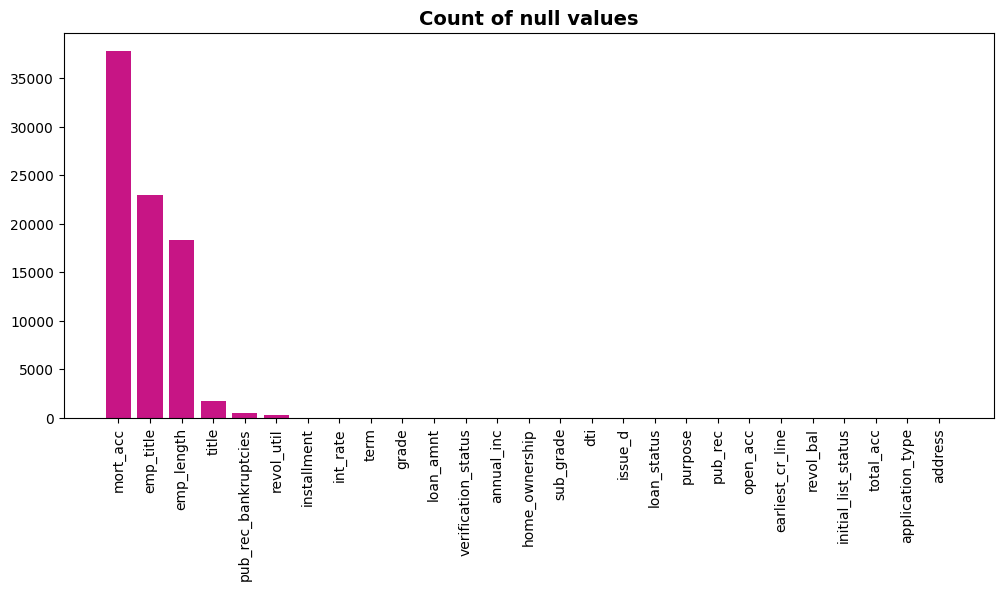

In [11]:
null_values = df.isna().sum().sort_values(ascending=False)
plt.figure(figsize= (12,5))
plt.bar(null_values.index,null_values , color='#C71585')
plt.xticks(rotation = 90)
plt.title('Count of null values' , fontsize = 14 , fontweight = 'bold')
plt.show()

In [12]:
df['loan_status'].value_counts(normalize=True)

,proportion
loan_status,
Fully Paid,0.803871
Charged Off,0.196129


###**Observation**
-  The dataset has 3,96,000 records and 26 columns
- Most of the null values are from *mort_acc,empl_title and emp_length columns*
- The dataset is imbalanced where 80 % of data is into Charged off and 20% into fully paid

#Data Cleaning

In [13]:
df[['state','pincode']] = df['address'].str.extract(r'([A-Z]{2}) (\d{5})')


In [14]:
df.drop(['address','issue_d'],axis=1,inplace = True)

In [15]:
df[(df['emp_title'].isna()) & (df['emp_length'].isna())].shape[0]/df.shape[0] * 100

4.576168472085448

In [16]:
df[df['title'].isna()]['loan_status'].value_counts()

,count
loan_status,
Fully Paid,1427
Charged Off,329


In [17]:
columns=['emp_title','emp_length','title','pub_rec_bankruptcies','grade']
def imputator(df):
  for i in columns:
    if i in df.columns:
      df[i].fillna(df[i].mode()[0],inplace=True)
  return df


In [18]:
imputator(df)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,state,pincode
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,OK,22690
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,SD,05113
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,WV,05113
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,MA,00813
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,VA,11650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,DC,30723
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,LA,05113
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,NY,70466
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,FL,29597


In [19]:
df['revol_util'].fillna(df['revol_util'].median(),inplace= True)
df['mort_acc'].fillna(df.groupby('total_acc')['mort_acc'].transform('median'),inplace=True)

In [20]:
df['emp_length'] = df['emp_length'].str.replace('<','0',regex= False)
df['emp_length'] = df['emp_length'].str.extract(r'(\d+)').astype(int)

**Note** : Since it is Financial data we cannot remove null values as it might give wrong interpretations. Hence filling the null values would be justified move here

#Uni variate Analysis

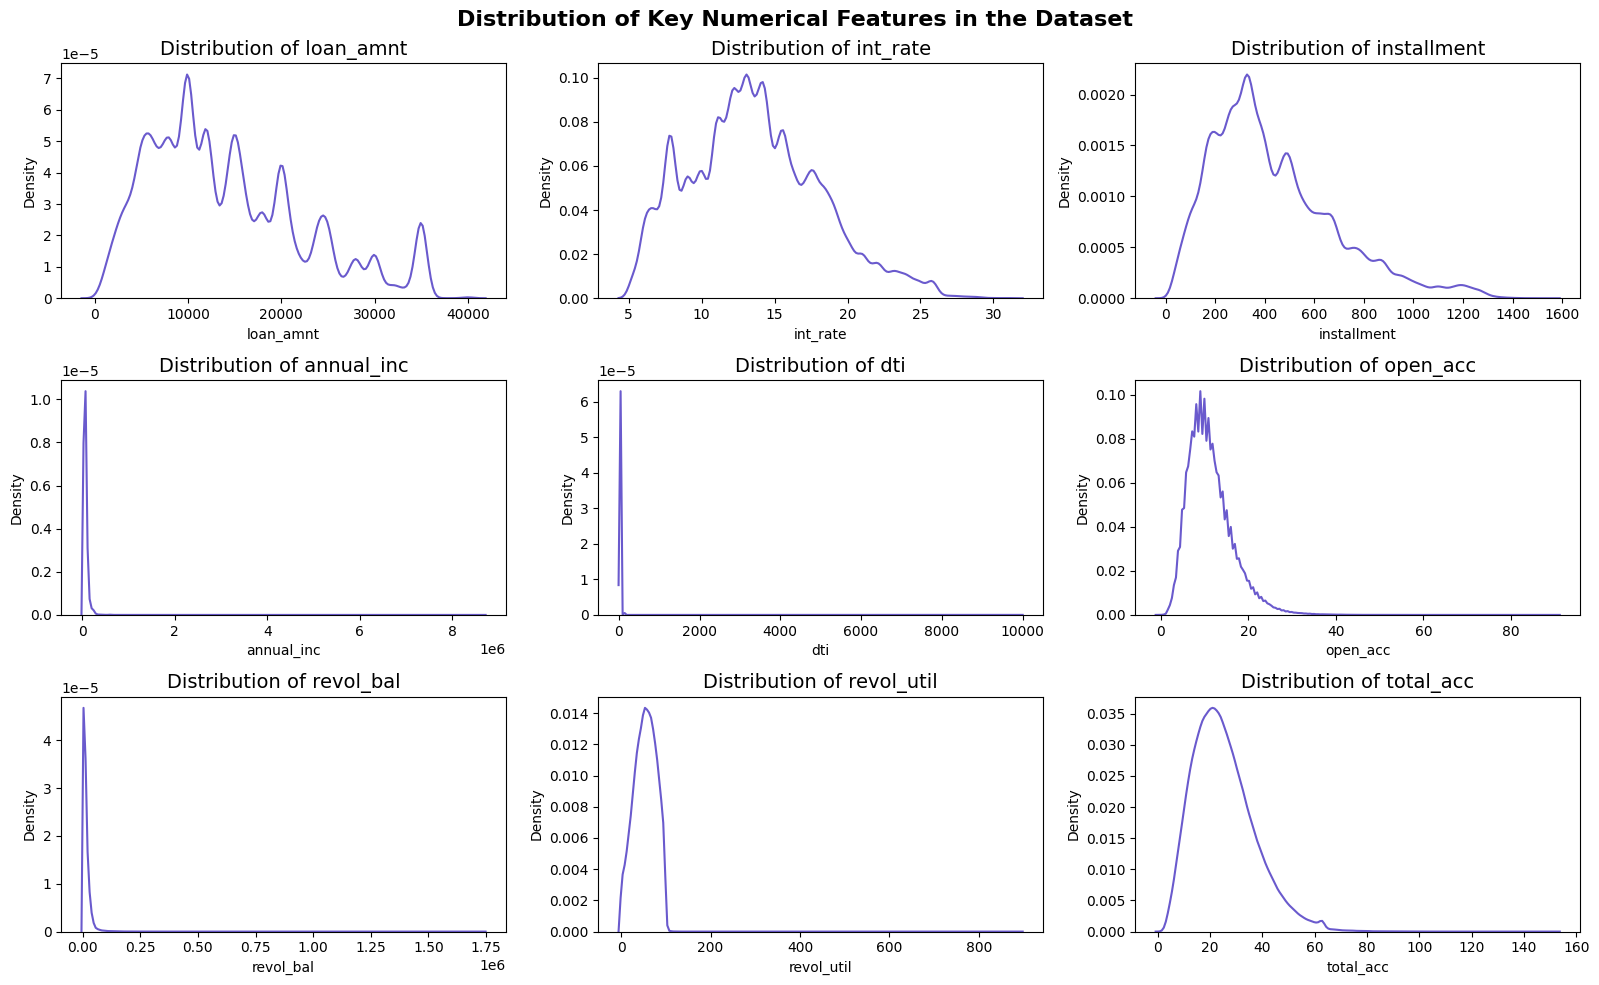

In [21]:
col=['loan_amnt','int_rate','installment','annual_inc','dti','open_acc','revol_bal','revol_util','total_acc']
palette=sns.color_palette('rocket')
fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(16,10))
axes=axes.flatten()
for i,column in enumerate(col):
  sns.kdeplot(data=df,x=column,ax=axes[i],color='#6A5ACD')
  axes[i].set_title(f'Distribution of {column}',fontsize=14)
plt.suptitle('Distribution of Key Numerical Features in the Dataset',fontsize=16,fontweight='bold')
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

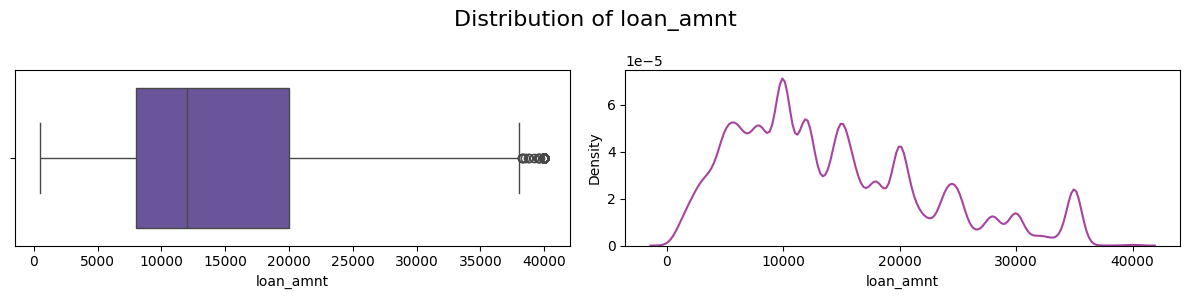

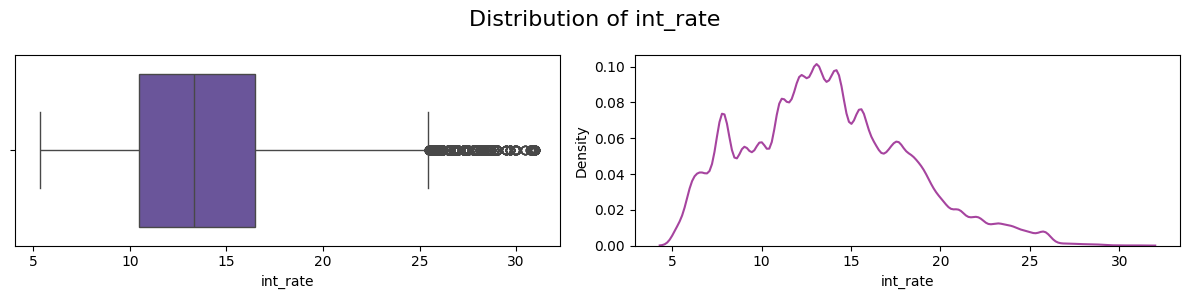

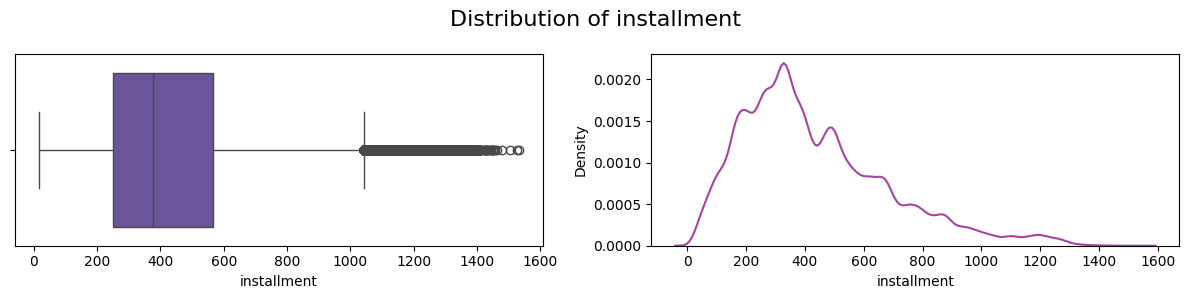

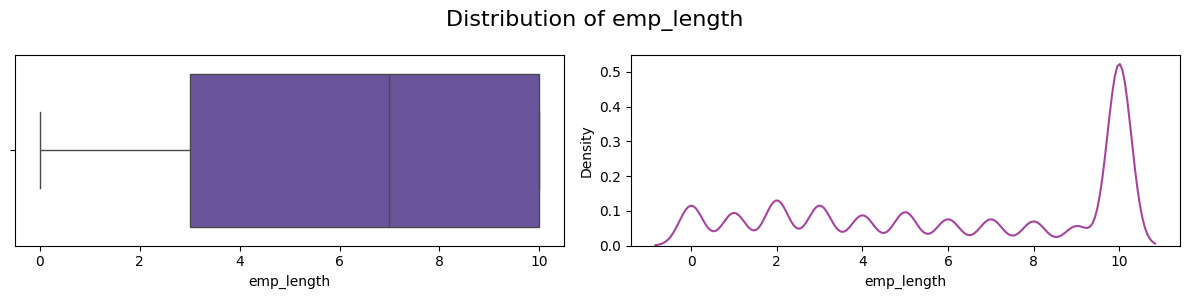

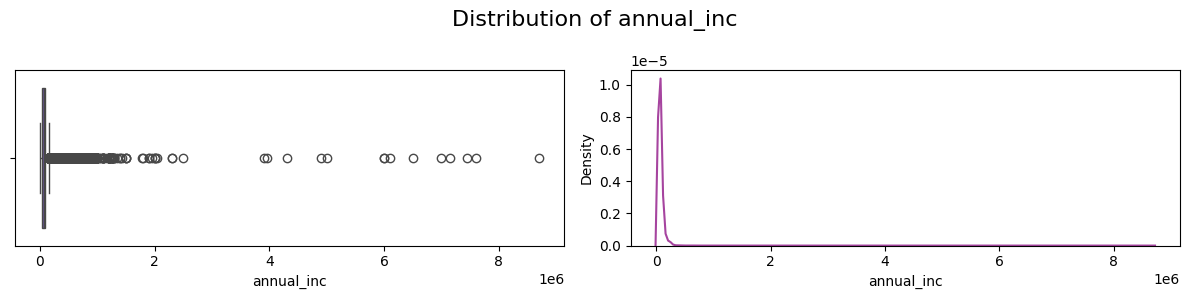

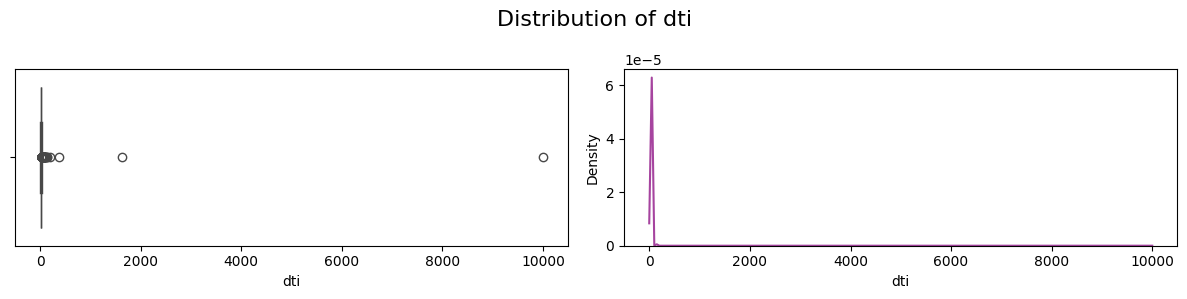

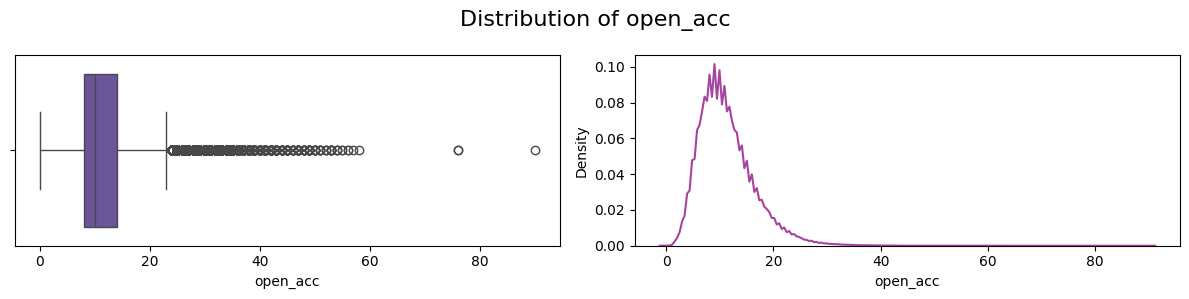

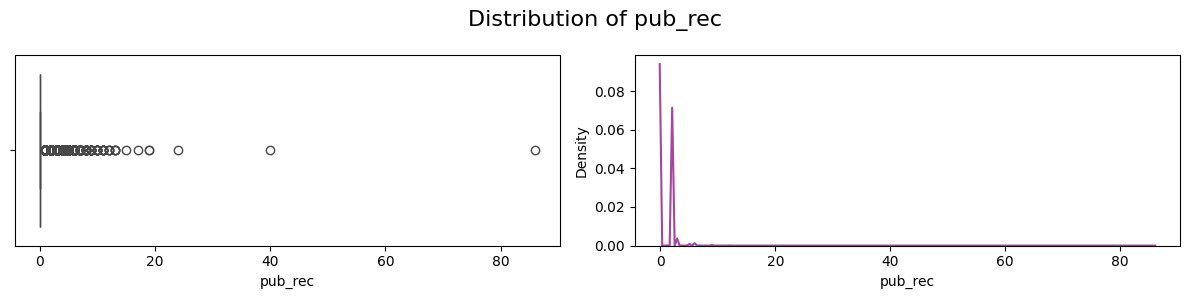

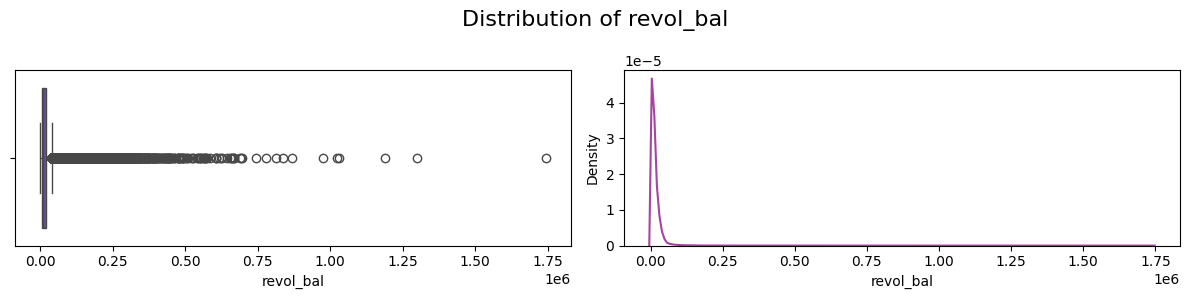

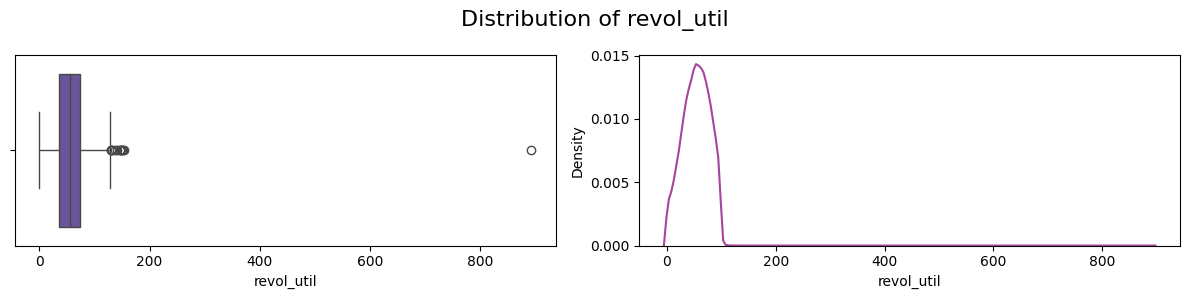

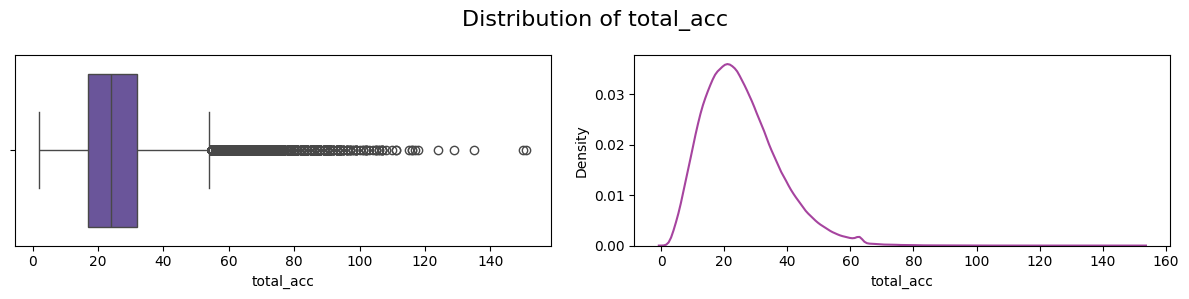

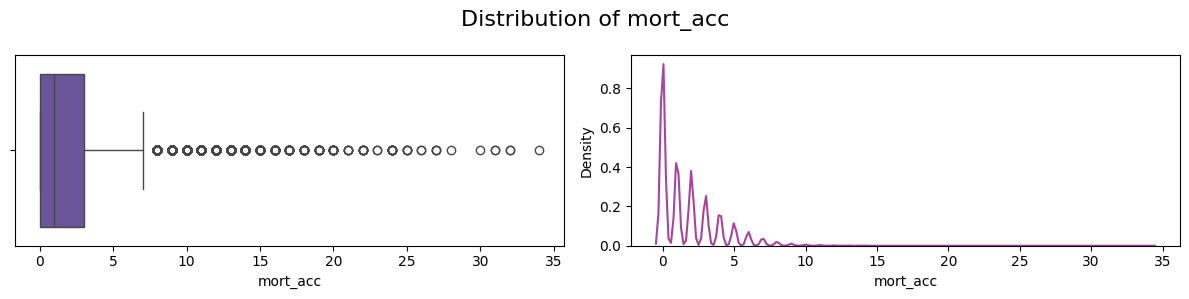

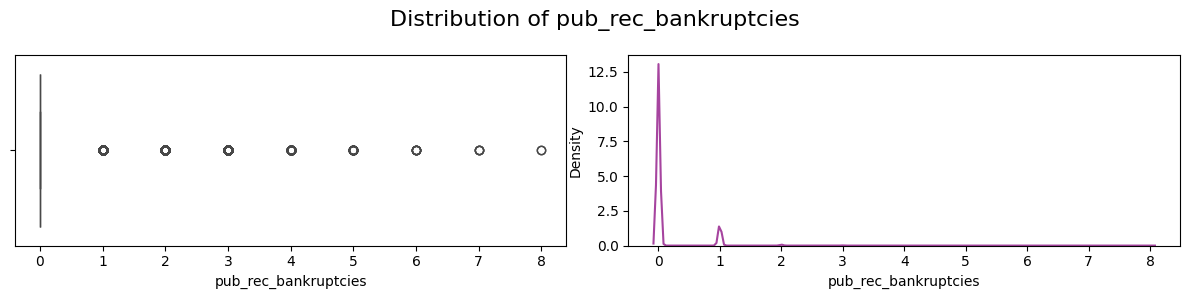

In [22]:
num = df.select_dtypes(include = np.number)
plt.suptitle('Distribution of Key Numerical Features in the Dataset',fontsize=16,fontweight='bold')
for i in num.columns:
  plt.figure(figsize = (12,3))
  plt.subplot(1,2,1)
  sns.boxplot(data = df , x = i ,color = "#6649A6"  )

  plt.subplot(1,2,2)
  sns.kdeplot(data = df , x= i , color = "#A6449F"  )

  plt.suptitle(f'Distribution of {i}',fontsize=16)
  plt.tight_layout()
  plt.show()


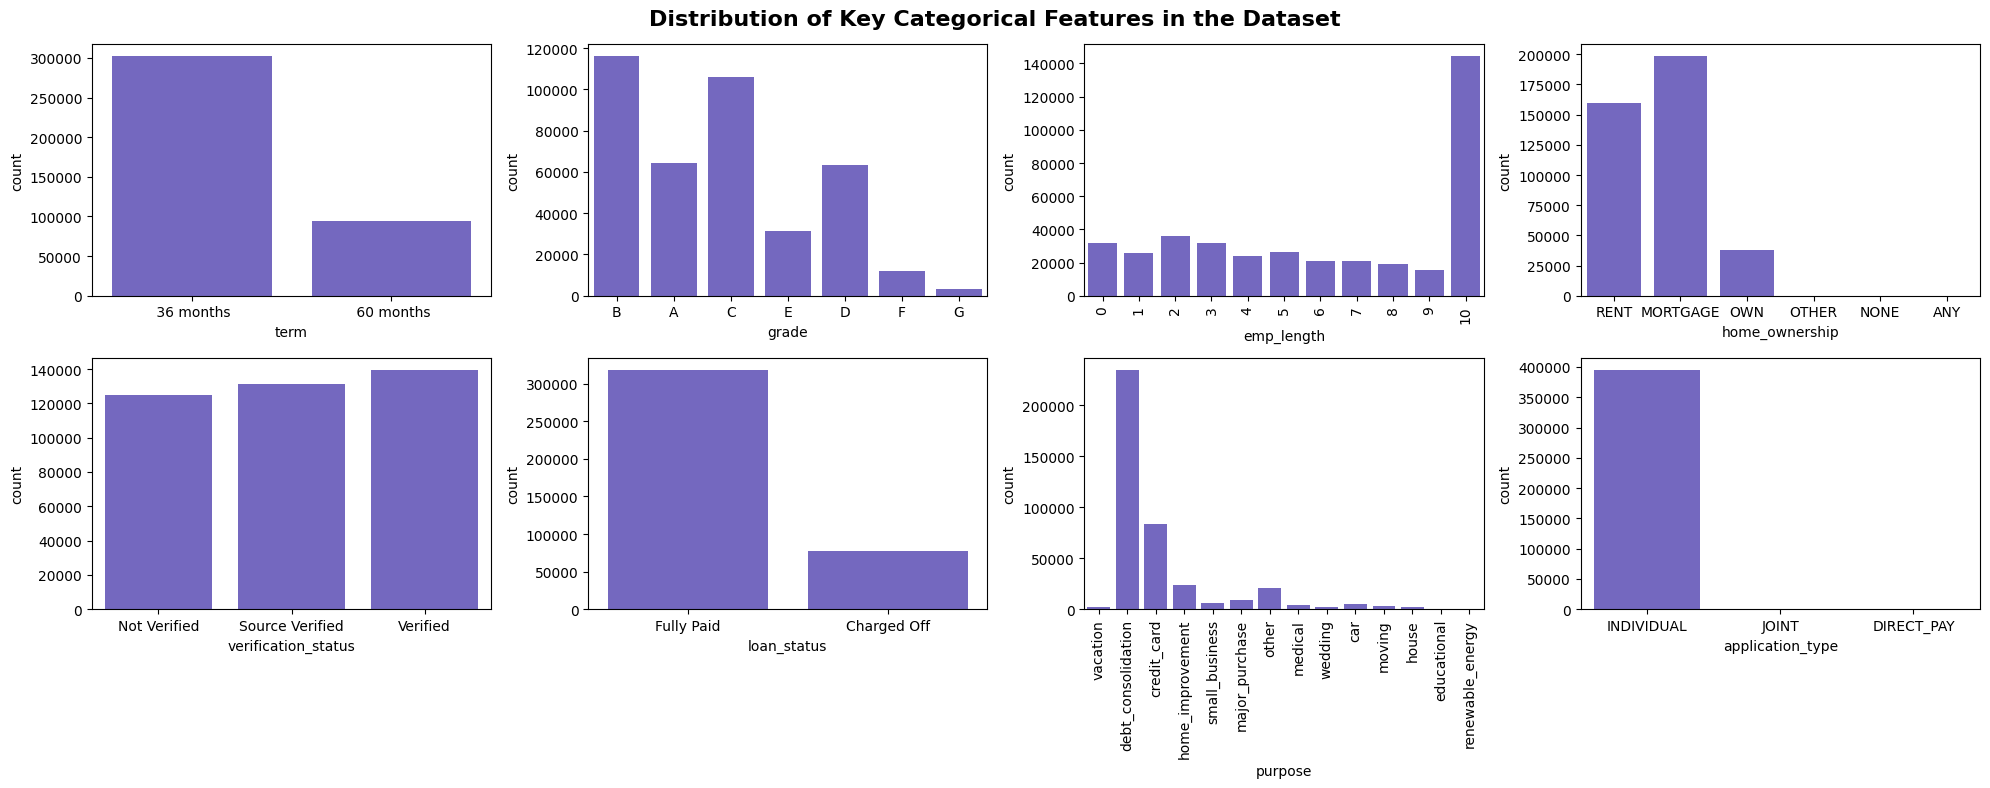

In [23]:
col=['term','grade','emp_length','home_ownership','verification_status','loan_status','purpose','application_type']
fig,axes=plt.subplots(nrows=2,ncols=4,figsize=(20,8))
axes=axes.flatten()
for i,column in enumerate(col):
  sns.countplot(data=df,x=column,ax=axes[i],color='#6A5ACD')
axes[2].tick_params(axis='x', rotation=90)
axes[6].tick_params(axis='x', rotation=90)
plt.suptitle('Distribution of Key Categorical Features in the Dataset',fontsize=16,fontweight='bold')
plt.tight_layout()


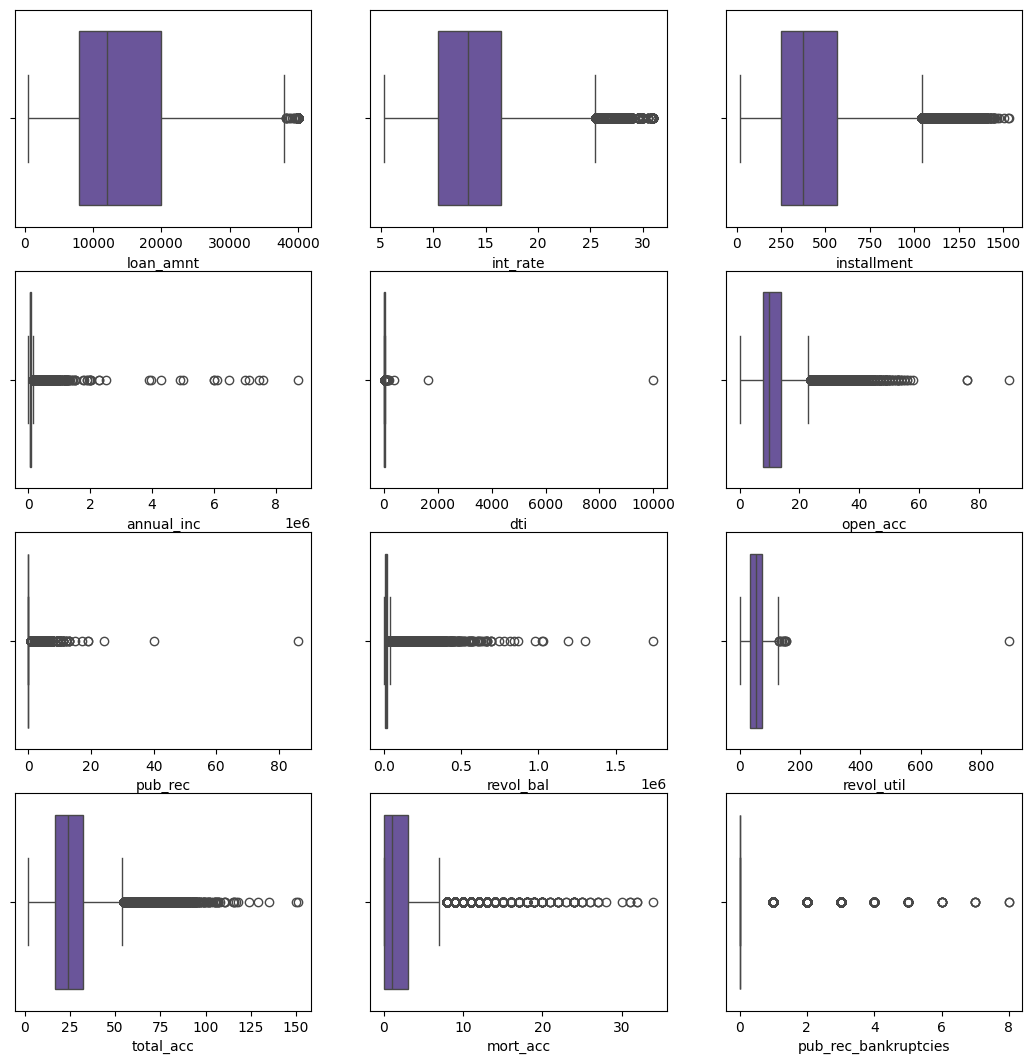

In [24]:
numerical_col=['loan_amnt','int_rate','installment','annual_inc','dti','open_acc','pub_rec','revol_bal','revol_util','total_acc','mort_acc','pub_rec_bankruptcies']
fig,axes = plt.subplots(nrows = 4, ncols =3 , figsize = (13,13))
axes = axes.flatten()
for index, col  in enumerate(numerical_col):
  sns.boxplot(data = df, x= col , ax = axes[index], color = "#6649A6")


##**Insights:**
- Most of the distributions in numerical columns are right skewed - indicating out liers
- Columns like Annual income, laon amount ,revol util have extreme outliers.
- Most of the applicants have opted for 36 months tenure for the loan with avg loan amount being 12500 and avg interest rate is 12.5
- MOst of the applicants are having experience >=10 years.
- Most of purpose are for loan consolidation and credit card.
- Most of application types are Individual applictaions

#Bi variate Analysis

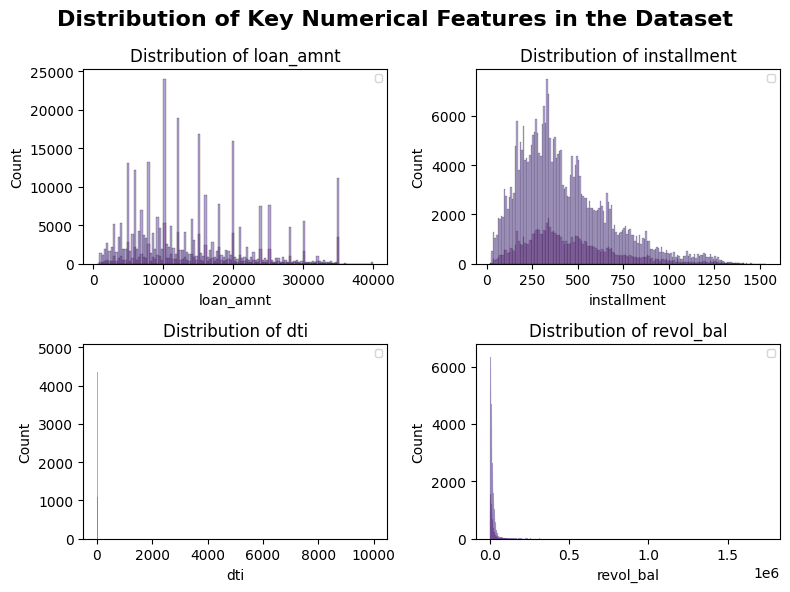

In [25]:
col=['loan_amnt','installment','dti','revol_bal']
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(8,6))
axes=axes.flatten()
for i,column in enumerate(col):
  sns.histplot(data=df,x=column,hue='loan_status',ax=axes[i],palette=["#6649A6","#A6449F" ])
  axes[i].legend(loc=1,fontsize=7)
  axes[i].set_title(f'Distribution of {column}')
plt.suptitle('Distribution of Key Numerical Features in the Dataset',fontsize=16,fontweight='bold')
plt.tight_layout()
plt.show()


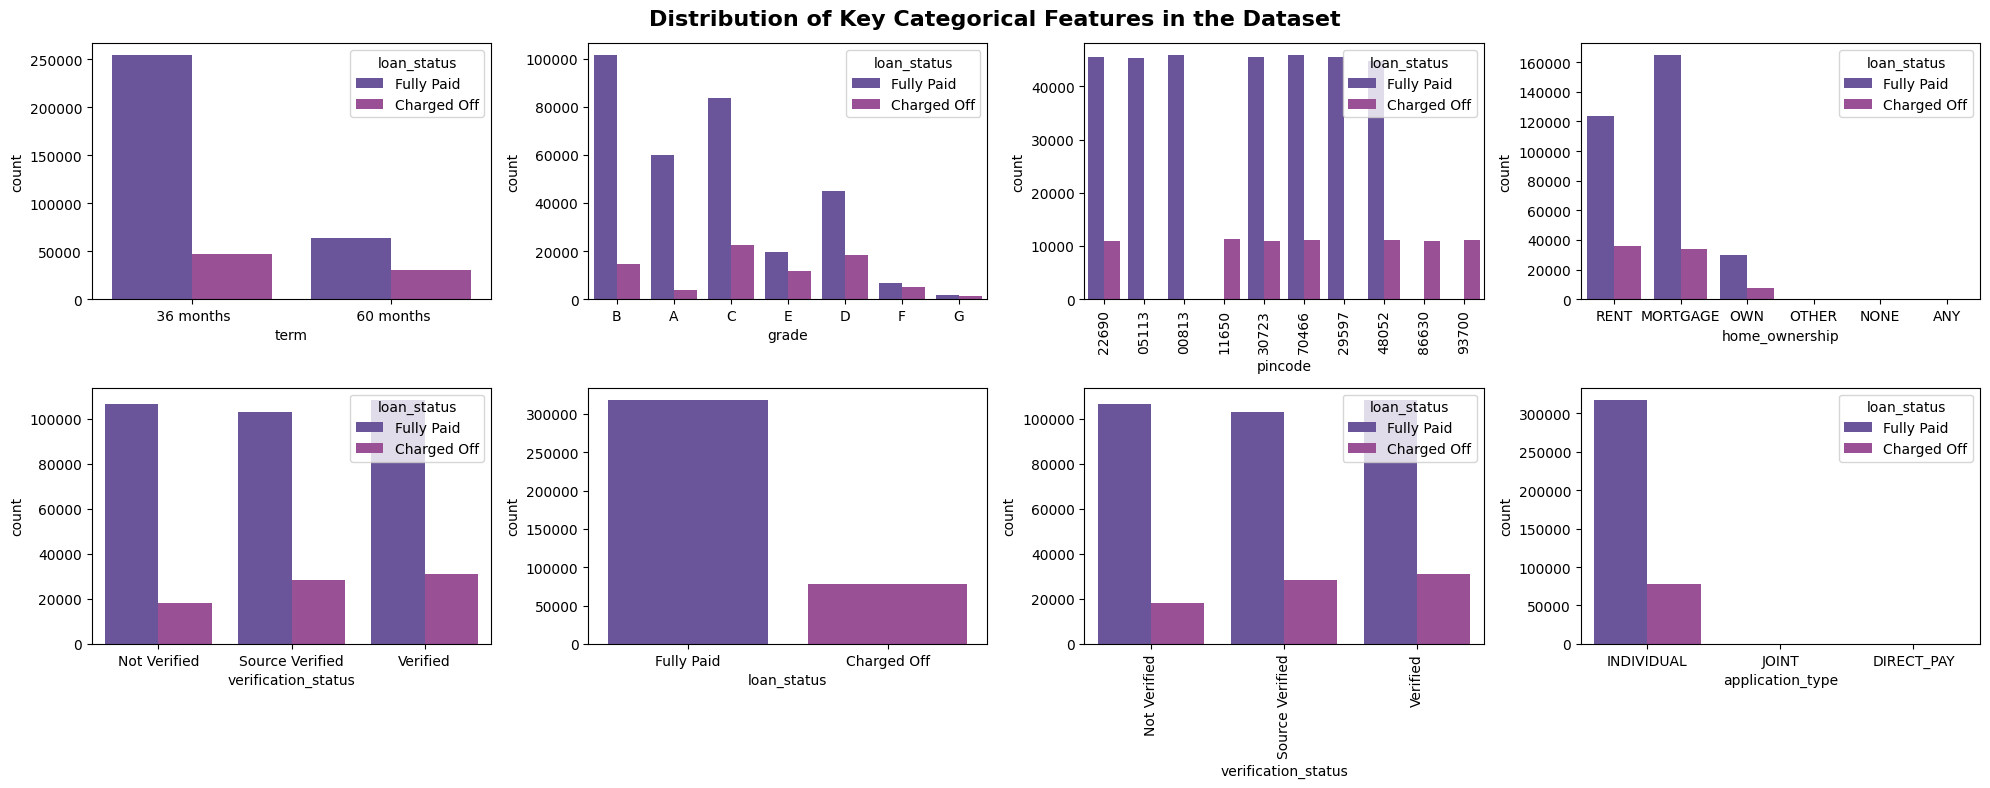

In [26]:
col=['term','grade','pincode','home_ownership','verification_status','loan_status','verification_status','application_type']
fig,axes=plt.subplots(nrows=2,ncols=4,figsize=(20,8))
axes=axes.flatten()
for i,column in enumerate(col):
  sns.countplot(data=df,x=column,hue='loan_status',ax=axes[i],palette=[ "#6649A6","#A6449F"])
axes[2].tick_params(axis='x', rotation=90)
axes[6].tick_params(axis='x', rotation=90)
plt.suptitle('Distribution of Key Categorical Features in the Dataset',fontsize=16,fontweight='bold')
plt.tight_layout()

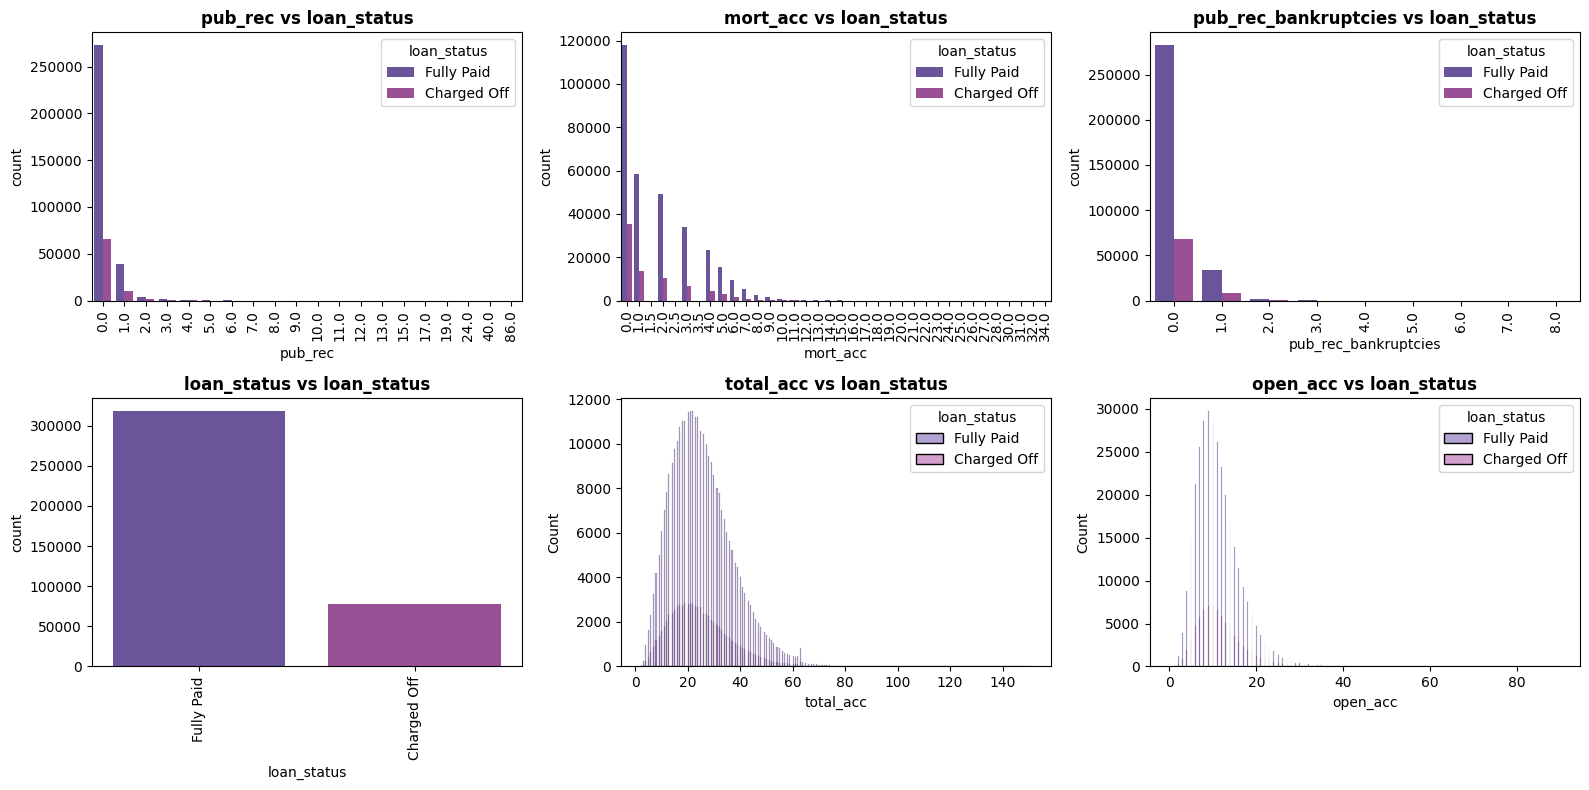

In [27]:
col = [ 'pub_rec' , 'mort_acc' , 'pub_rec_bankruptcies' , 'loan_status']
fig,axes = plt.subplots(nrows = 2, ncols =3, figsize = (16,8))
axes = axes.flatten()

for i,j in enumerate(col):
  sns.countplot(data = df , x = j , hue ='loan_status' , ax = axes[i],palette=["#6649A6", "#A6449F"])
  axes[i].set_title(f'{j} vs loan_status' , fontdict={'fontweight': 'bold'})
  axes[i].tick_params(axis='x', rotation=90)
sns.histplot(data=df , x= 'total_acc' , hue = 'loan_status' , ax = axes[4], palette=["#6649A6", "#A6449F"])
axes[4].set_title('total_acc vs loan_status', fontdict={'fontweight': 'bold'})
sns.histplot(data=df , x= 'open_acc' , hue = 'loan_status' , ax = axes[5], palette=["#6649A6", "#A6449F"])
axes[5].set_title('open_acc vs loan_status', fontdict={'fontweight': 'bold'})
plt.tight_layout()
plt.show()


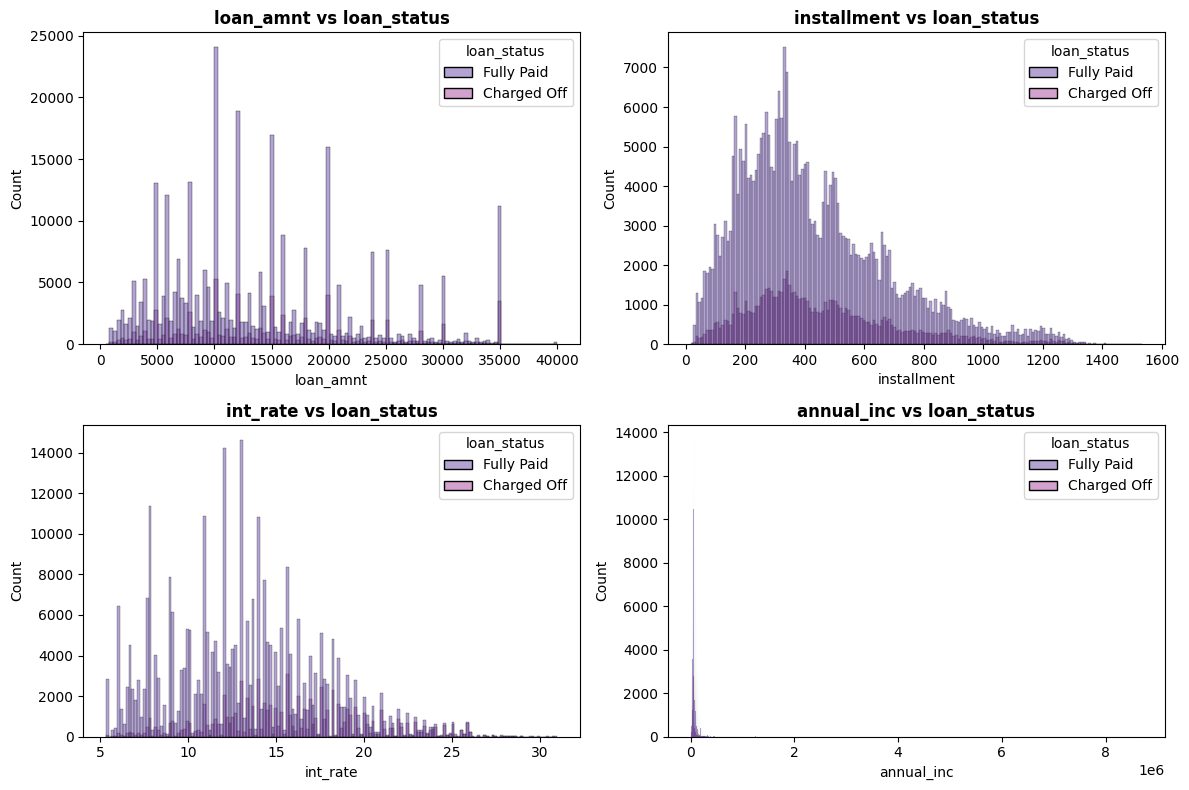

In [28]:
col = ['loan_amnt', 'installment', 'int_rate', 'annual_inc']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()

for i, j in enumerate(col):
    sns.histplot(data=df, x=j, hue = 'loan_status',ax=axes[i], palette=["#6649A6", "#A6449F"])
    axes[i].set_title(f'{j} vs loan_status', fontdict={'fontweight': 'bold'})

plt.tight_layout()
plt.show()




##Insights
 **Categorical features**
- 60-month loans have a higher proportion of charged-off cases, indicating longer terms may carry more default risk.

- Lower-grade loans (A, B, C) show higher counts and better performance, while higher grades (D–G) have more defaults.

- Pincodes such as 11650, 86630, and 93700 have a high number of charged-off loans, indicating potential geographic risk.

- There is noticeable variability in default rates across locations, suggesting regional factors may impact loan performance.

- Almost all loan applications come from INDIVIDUAL borrowers, with very few JOINT or DIRECT_PAY applications.


**Numerical Fetures**
- Most borrowers have zero or one public record (pub_rec) and bankruptcies (pub_rec_bankruptcies), and loans in these categories are mostly fully paid. However, as the values increase, the proportion of charged-off loans also slightly increases.

- mort_acc (number of mortgage accounts) is concentrated around 0–5 accounts. As the number of mortgage accounts increases, the number of charged-off loans tends to decrease, indicating that borrowers with more mortgage experience may be less risky.

- Borrowers with lower total_acc (total credit lines) and open_acc (open credit lines) show a higher proportion of defaults. This suggests that limited credit history might correlate with higher risk.

- Most values across features are heavily right-skewed, meaning a majority of borrowers fall into the lower end of each numeric feature, with very few having extremely high values—important for outlier handling and normalization.

- Higher interest rates (int_rate) correlate with more charged-off loans, indicating that riskier borrowers (who are charged higher rates) are more likely to default.

- Loan amounts (loan_amnt) and installments show that charged-off loans are more common in the mid-range values (~$5,000–$15,000 loan amount, ~$200–$600 installment), suggesting potential risk bands in these ranges.

- Annual income (annual_inc) is highly skewed, with most borrowers earning under $200,000. Higher incomes do not show a strong reduction in charge-offs, implying income alone is not a sufficient predictor of loan performance.

#Multi variate Analysis

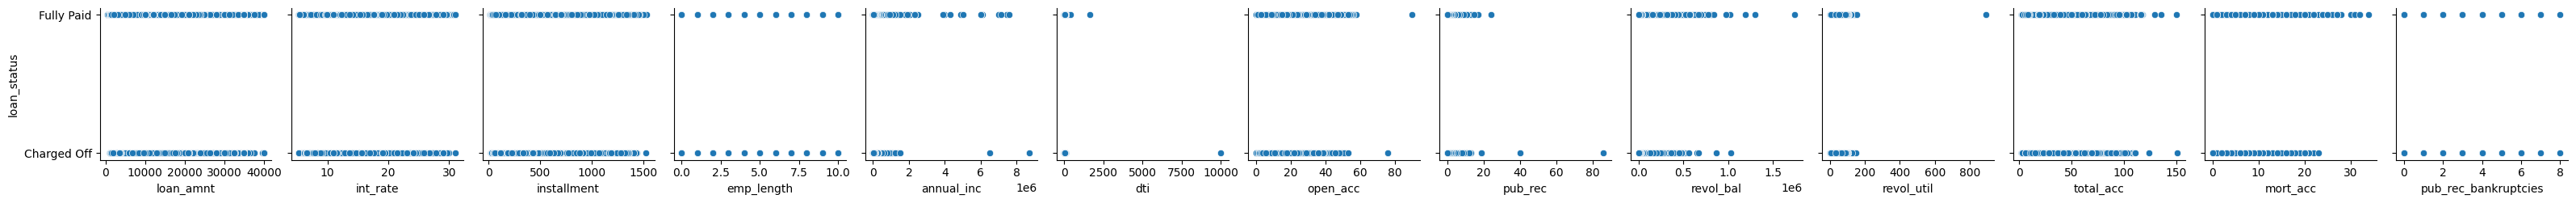

In [29]:
sns.pairplot(data=df, y_vars = 'loan_status',palette= [ "#6649A6","#A6449F"])

In [30]:
df_numerical=df.select_dtypes(include=[int,float])


<Axes: >

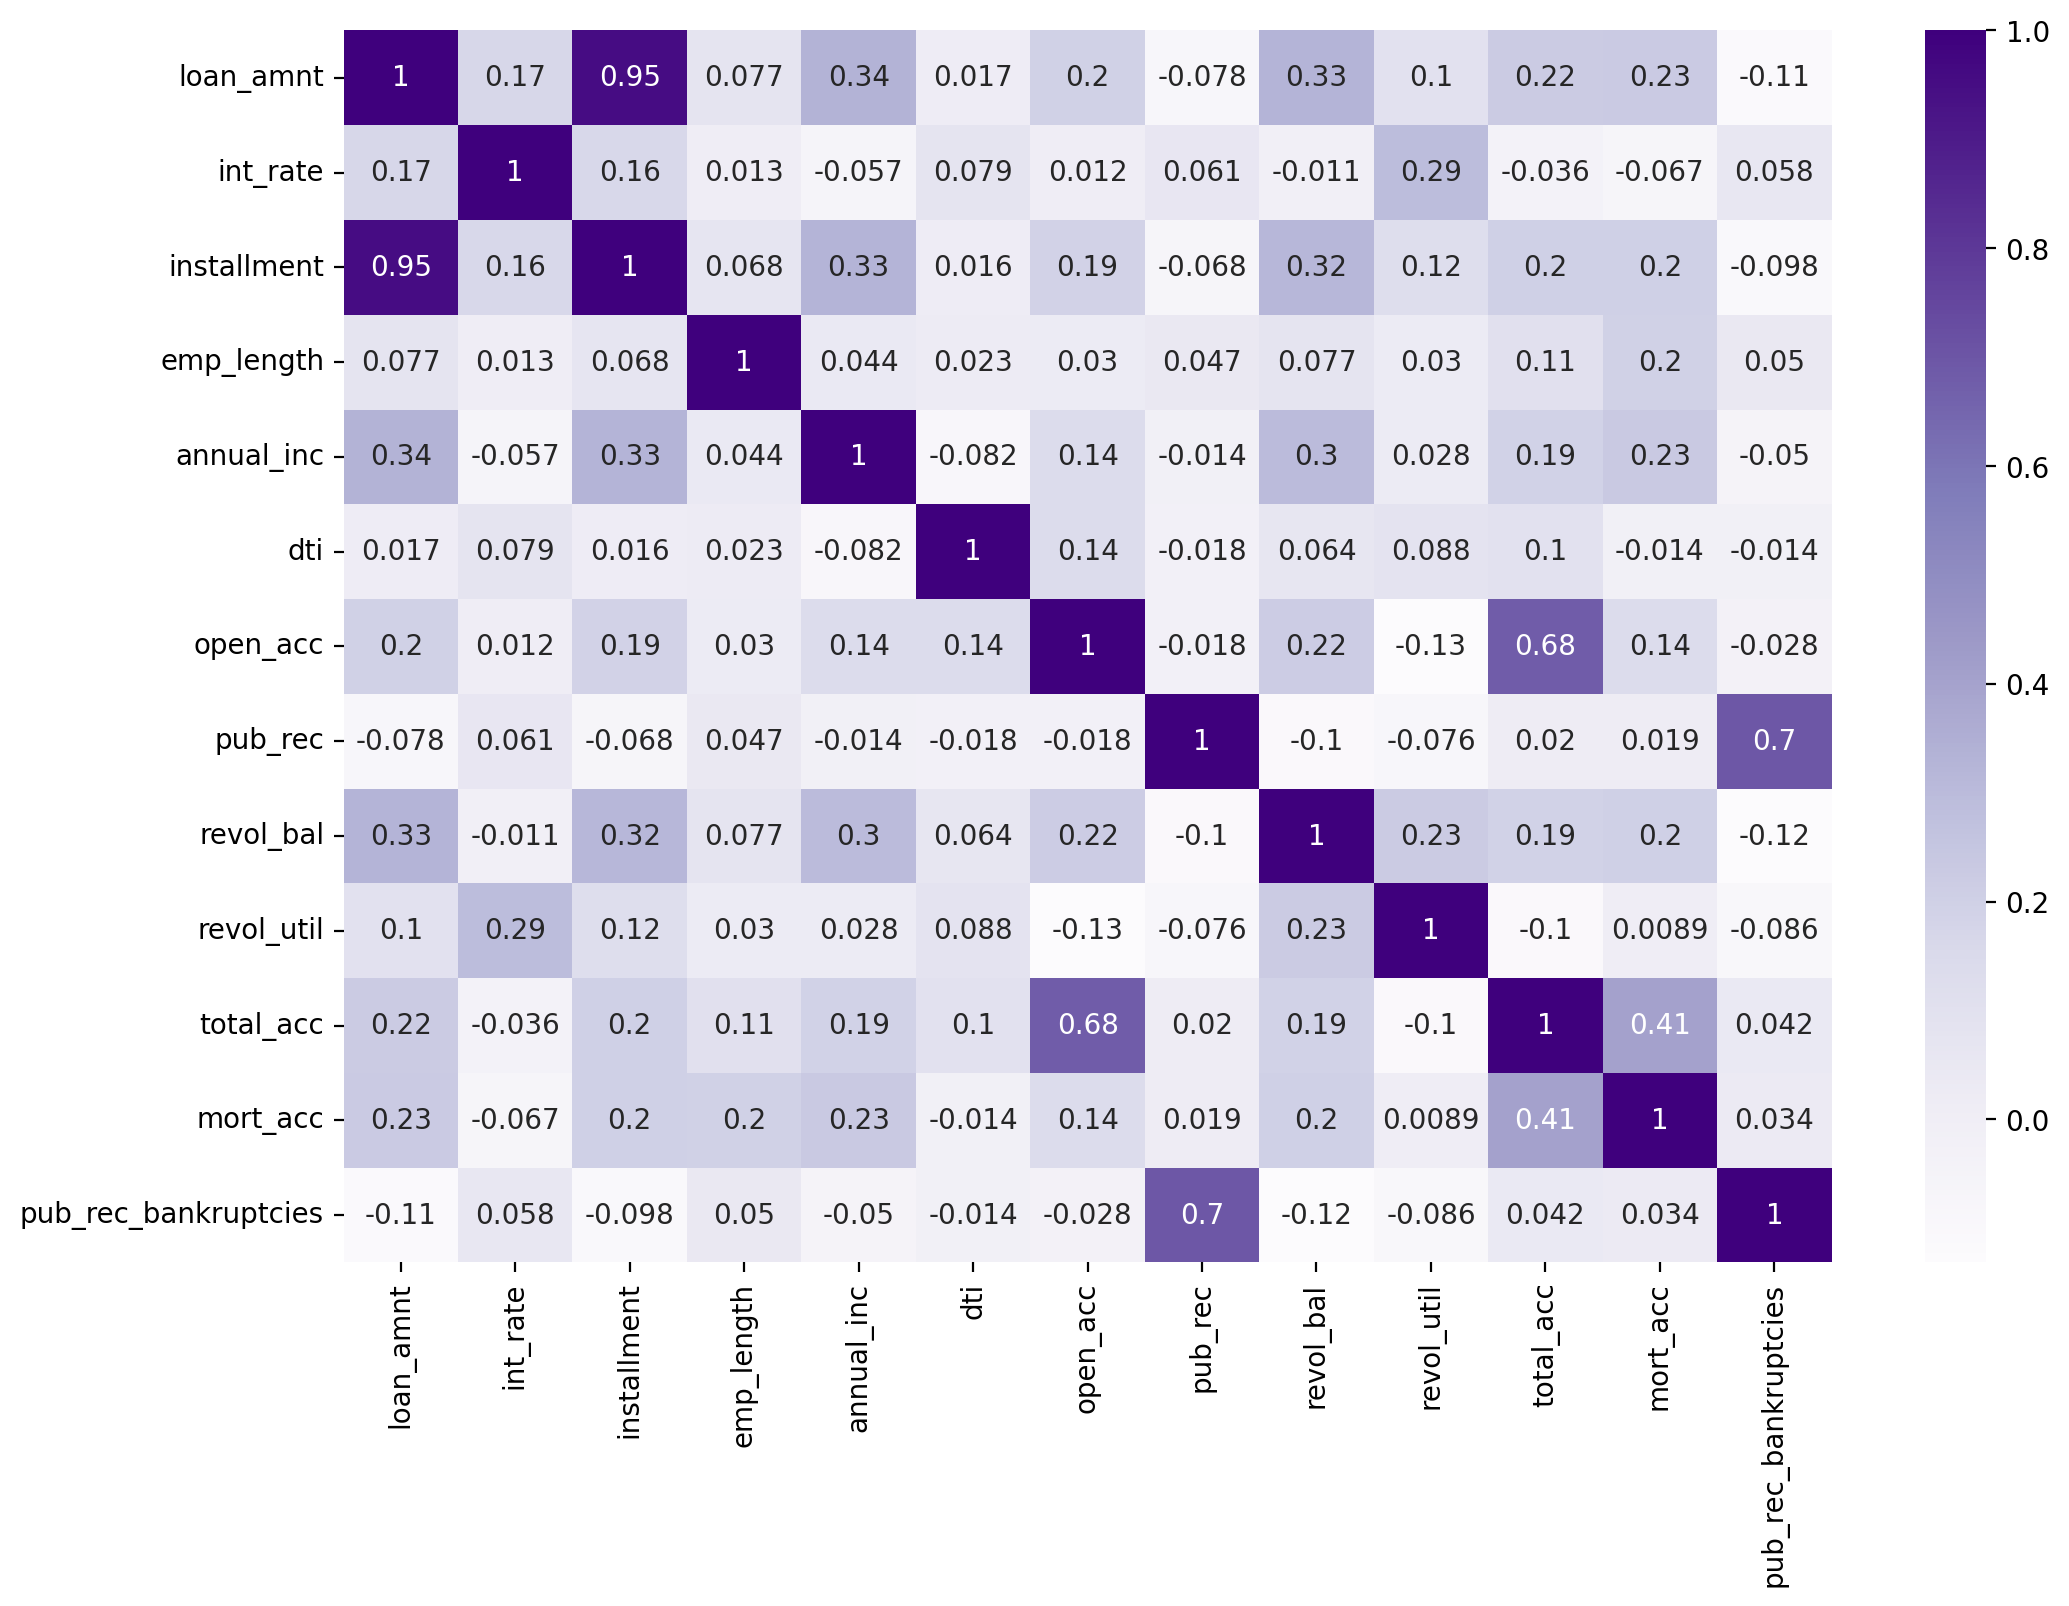

In [31]:
plt.figure(figsize = (12,8),dpi = 200)
# custom_cmap = sns.color_palette(["#6649A6", "#BA95BF", "#8C3E87", "#A6449F"], as_cmap=True)
sns.heatmap(df_numerical.corr(),annot=True,cmap= 'Purples')

##**Insights**:
- **Loan amount and installment are highly correlated (0.95)** – as expected, higher loan amounts lead to higher monthly installments.

- **Total accounts and open accounts show a strong correlation (0.68)** – borrowers with more total accounts tend to have more open ones.

- **Public record bankruptcies and public records have a strong correlation (0.70)** – bankruptcies are often recorded in public financial records.

- **Most other features show weak or negligible correlations** – variables like employment length and DTI don't have strong linear relationships with others.

#Treating Outliers

In [32]:
numerical_col=['loan_amnt','int_rate','installment','annual_inc','dti','open_acc','pub_rec','revol_bal','revol_util','total_acc','mort_acc','pub_rec_bankruptcies']
for i in numerical_col:
  lower_limit = np.percentile(df[i],1)
  upper_limit = np.percentile(df[i],99)
  df[i] = np.clip(df[i],lower_limit, upper_limit)



##**Note** :
- The IQR method was used to identify outliers.

- Given the financial nature of the data, the 1st and 99th percentiles were used as bounds instead of the usual 25th and 75th, to remove only extreme values.

- Out-of-range values were clipped using np.clip, replacing them with the nearest boundary values (i.e., the 1st or 99th percentile).

#Feature Engineering

In [33]:
df['mort_acc'] = df['mort_acc'].map(lambda x: 1 if x>0 else 0)
df['pub_rec'] = df['pub_rec'].map(lambda x: 1 if x>0 else 0)
df['pub_rec_bankruptcies'] = df['mort_acc'].map(lambda x: 1 if x>0 else 0)

In [34]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])

In [35]:
df['credit_age'] = 2025 - df['earliest_cr_line'].dt.year

In [36]:
df.drop('earliest_cr_line', axis = 1, inplace = True)

In [37]:
df.drop(['emp_title', 'title','installment'], axis = 1 , inplace = True)


In [38]:
df.drop('int_rate' ,axis = 1, inplace = True)

##**Note**
- Removed highly correlated features such as int_rate to reduce multicollinearity.

- Created a new feature, credit_age, derived from earliest_cr_line to represent the age of the credit history.

- Dropped insignificant features like emp_title, title, and installment, as they showed little to no impact on the target variable.Removed highly correlated features such as int_rate to reduce multicollinearity.

- Created a new feature, credit_age, derived from earliest_cr_line to represent the age of the credit history.

- Dropped insignificant features like emp_title, title, and installment, as they showed little to no impact on the target variable.

#Data Pre processing

In [39]:
grade_order = {'A' : 0 , 'B' :1 , 'C' : 2, 'D' : 3 , 'E' : 4, 'F':5 , 'G' :6}
df['grade'] = df['grade'].map(grade_order)

In [40]:
df_dummy  = pd.get_dummies(df, columns = ['application_type' , 'initial_list_status','verification_status' , 'term','home_ownership', 'pincode' ],drop_first = True)

In [41]:
dummies =  [ i for i in df_dummy.columns if i not in df.columns ]
for i in dummies:
  df_dummy[i] = df_dummy[i].astype(int)

In [42]:
df_dummy.drop('pub_rec' , axis = 1 , inplace = True)

In [43]:
df_dummy['loan_status'] = df_dummy['loan_status'].map({'Fully Paid' : 1,  'Charged Off' : 0})

In [44]:
col = [ 'sub_grade']
encoder = OrdinalEncoder()
df_dummy[col] = encoder.fit_transform(df_dummy[col])

In [45]:
target_mean = df_dummy.groupby('purpose')['loan_status'].mean()
df_dummy['purpose'] = df_dummy['purpose'].map(target_mean)

target_mean = df_dummy.groupby('state')['loan_status'].mean()
df_dummy['state'] = df_dummy['state'].map(target_mean)

In [46]:
y = df_dummy['loan_status'].apply(int)
x= df_dummy.drop(columns = 'loan_status')

x_train,x_remaining,y_train,y_remaining = train_test_split(x, y, test_size = 0.3, random_state=64)
x_test,x_val,y_test,y_val =  train_test_split(x_remaining , y_remaining , test_size = 0.5,random_state = 71)



In [47]:
num_cols = ['loan_amnt' , 'annual_inc'  , 'dti' , 'open_acc' , 'revol_bal' , 'revol_util' , 'total_acc' , 'credit_age' ,'grade' , 'sub_grade' , 'emp_length']
cat_cols = [ col for col in x_train.columns if col not in num_cols]
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_num  = pd.DataFrame(scaler.fit_transform(x_train[num_cols]) , columns=num_cols, index=x_train.index)
x_val_num = pd.DataFrame(scaler.transform(x_val[num_cols]), columns=num_cols, index=x_val.index)
x_test_num = pd.DataFrame(scaler.transform(x_test[num_cols]) ,columns=num_cols, index=x_test.index)

x_train_final = pd.concat([x_train_num , x_train[cat_cols]] , axis = 1)
x_val_final = pd.concat([x_val_num , x_val[cat_cols]] , axis = 1)
x_test_final = pd.concat([x_test_num , x_test[cat_cols]] , axis = 1)

#Fitting the model

##Base Model

In [48]:
base_model = LogisticRegression()
base_model.fit(x_train_final,y_train )

LogisticRegression()

In [49]:
y_pred_val = base_model.predict(x_val_final)

In [50]:
print(classification_report(y_val,y_pred_val))

              precision    recall  f1-score   support

           0       0.92      0.48      0.63     11619
           1       0.89      0.99      0.94     47786

    accuracy                           0.89     59405
   macro avg       0.90      0.73      0.78     59405
weighted avg       0.89      0.89      0.87     59405



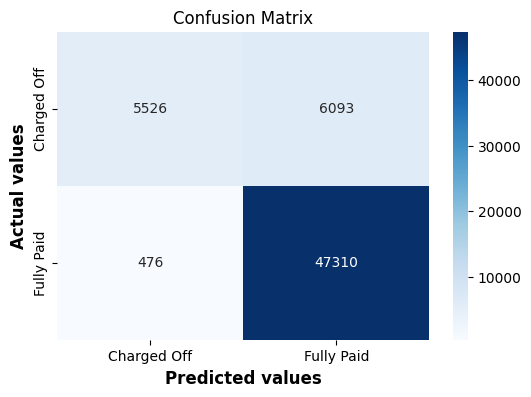


Base Model performance
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.92      0.48      0.63     11619
           1       0.89      0.99      0.94     47786

    accuracy                           0.89     59405
   macro avg       0.90      0.73      0.78     59405
weighted avg       0.89      0.89      0.87     59405



In [51]:


cm = confusion_matrix(y_val,y_pred_val)
plt.figure(figsize=(6, 4))
sns.heatmap(cm , fmt = 'd', annot = True, cmap='Blues')
plt.xlabel('Predicted values', fontweight = 'bold' , fontsize = 12)
plt.ylabel('Actual values', fontweight = 'bold', fontsize = 12)
plt.title('Confusion Matrix')

plt.xticks(ticks=[0.5, 1.5], labels=['Charged Off', 'Fully Paid'])
plt.yticks(ticks=[0.5, 1.5], labels=['Charged Off', 'Fully Paid'])
plt.show()
print()
print('Base Model performance')
print('----' * 50)
print()

print(classification_report(y_val,y_pred_val))

##Model with class weight

In [52]:
weighted_model = LogisticRegression(class_weight= 'balanced')
weighted_model.fit(x_train_final,y_train)

LogisticRegression(class_weight='balanced')

In [53]:
y_val_pred = weighted_model.predict(x_val_final)

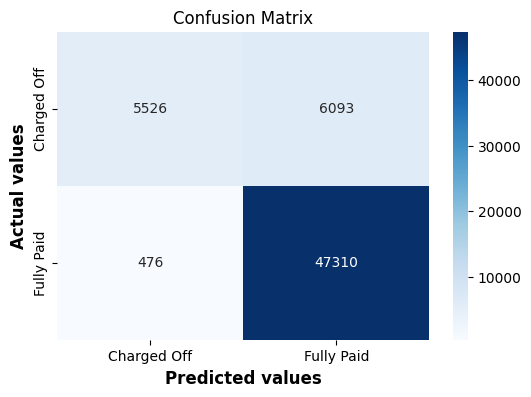


Weighted Model performance
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.92      0.48      0.63     11619
           1       0.89      0.99      0.94     47786

    accuracy                           0.89     59405
   macro avg       0.90      0.73      0.78     59405
weighted avg       0.89      0.89      0.87     59405



In [54]:
cm = confusion_matrix(y_val,y_pred_val)
plt.figure(figsize=(6, 4))
sns.heatmap(cm , fmt = 'd', annot = True, cmap='Blues')
plt.xlabel('Predicted values', fontweight = 'bold' , fontsize = 12)
plt.ylabel('Actual values', fontweight = 'bold', fontsize = 12)
plt.title('Confusion Matrix')

plt.xticks(ticks=[0.5, 1.5], labels=['Charged Off', 'Fully Paid'])
plt.yticks(ticks=[0.5, 1.5], labels=['Charged Off', 'Fully Paid'])
plt.show()

print()
print('Weighted Model performance')
print('----' * 50)
print()

print(classification_report(y_val,y_pred_val))

## Balancing the data with smote

In [55]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()

In [56]:
x_sm,y_sm = smt.fit_resample(x_train_final,y_train)

### Base model with Balanced data


In [57]:
balanced_model = LogisticRegression()
balanced_model.fit(x_sm, y_sm)

LogisticRegression()

In [58]:
y_pred_val = balanced_model.predict(x_val_final)

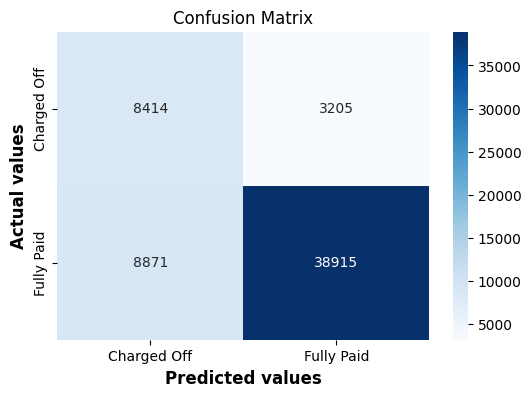


Balanced Model performance
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.49      0.72      0.58     11619
           1       0.92      0.81      0.87     47786

    accuracy                           0.80     59405
   macro avg       0.71      0.77      0.72     59405
weighted avg       0.84      0.80      0.81     59405



In [59]:
cm = confusion_matrix(y_val,y_pred_val)
plt.figure(figsize=(6, 4))
sns.heatmap(cm , fmt = 'd', annot = True, cmap='Blues')
plt.xlabel('Predicted values', fontweight = 'bold' , fontsize = 12)
plt.ylabel('Actual values', fontweight = 'bold', fontsize = 12)
plt.title('Confusion Matrix')

plt.xticks(ticks=[0.5, 1.5], labels=['Charged Off', 'Fully Paid'])
plt.yticks(ticks=[0.5, 1.5], labels=['Charged Off', 'Fully Paid'])
plt.show()

print()
print('Balanced Model performance')
print('----' * 50)
print()

print(classification_report(y_val,y_pred_val))

### Weighted model with Balanced data

In [60]:
balanced_weighted_model = LogisticRegression(class_weight='balanced')
balanced_weighted_model.fit(x_sm, y_sm)

LogisticRegression(class_weight='balanced')

In [61]:
y_prob = balanced_weighted_model.predict_proba(x_val_final)[:, 1]

In [75]:
best_threshold = 0.38
y_pred_val = (y_prob>=best_threshold).astype(int)

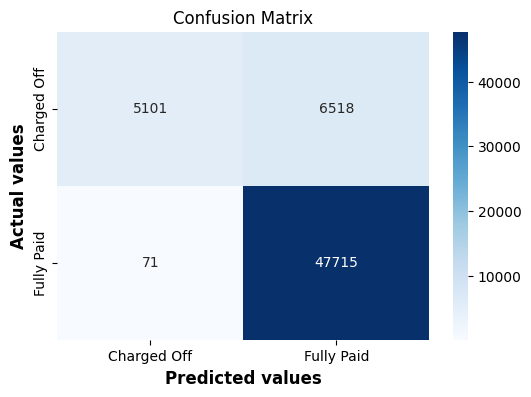


Balanced and weighted model performance
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.99      0.44      0.61     11619
           1       0.88      1.00      0.94     47786

    accuracy                           0.89     59405
   macro avg       0.93      0.72      0.77     59405
weighted avg       0.90      0.89      0.87     59405



In [76]:

cm = confusion_matrix(y_val,y_pred_val)
plt.figure(figsize=(6, 4))
sns.heatmap(cm , fmt = 'd', annot = True, cmap='Blues')
plt.xlabel('Predicted values', fontweight = 'bold' , fontsize = 12)
plt.ylabel('Actual values', fontweight = 'bold', fontsize = 12)
plt.title('Confusion Matrix')

plt.xticks(ticks=[0.5, 1.5], labels=['Charged Off', 'Fully Paid'])
plt.yticks(ticks=[0.5, 1.5], labels=['Charged Off', 'Fully Paid'])
plt.show()

print()
print('Balanced and weighted model performance')
print('----' * 50)
print()

print(classification_report(y_val,y_pred_val))

## Changing the threshold


###Changing threshold Base model

In [77]:
thresh_base_model = LogisticRegression()
thresh_base_model.fit(x_train_final,y_train)

LogisticRegression()

In [78]:
precision , recall, thresholds = precision_recall_curve(y_val,y_prob)
f1_scores = 2 * precision * recall / (precision + recall + 1e-9)
best_threshold = thresholds[f1_scores[:-1].argmax()]
print(f'The best threshold value is {best_threshold}')

The best threshold value is 0.3864997910815353


In [79]:
y_prob  = thresh_base_model.predict_proba(x_val_final)[: ,1]


In [80]:
y_pred_val = (y_prob>=best_threshold).astype(int)

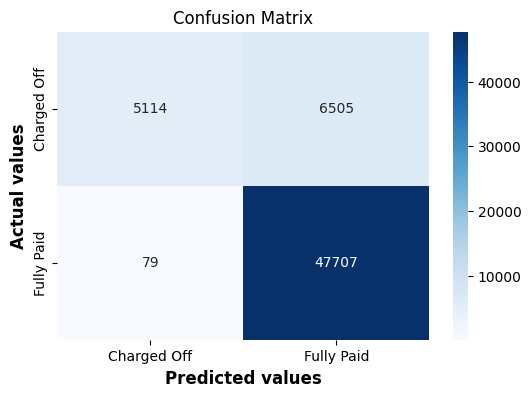


Base model Model performance after changing threshold
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.98      0.44      0.61     11619
           1       0.88      1.00      0.94     47786

    accuracy                           0.89     59405
   macro avg       0.93      0.72      0.77     59405
weighted avg       0.90      0.89      0.87     59405



In [81]:
cm = confusion_matrix(y_val,y_pred_val)
plt.figure(figsize=(6, 4))
sns.heatmap(cm , fmt = 'd', annot = True, cmap='Blues')
plt.xlabel('Predicted values', fontweight = 'bold' , fontsize = 12)
plt.ylabel('Actual values', fontweight = 'bold', fontsize = 12)
plt.title('Confusion Matrix')

plt.xticks(ticks=[0.5, 1.5], labels=['Charged Off', 'Fully Paid'])
plt.yticks(ticks=[0.5, 1.5], labels=['Charged Off', 'Fully Paid'])
plt.show()


print()
print('Base model Model performance after changing threshold')
print('----' * 50)
print()

print(classification_report(y_val,y_pred_val))

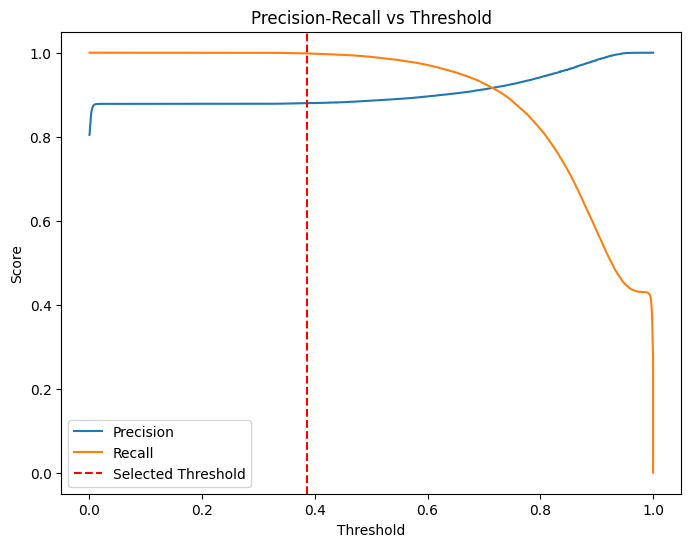

In [82]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_val, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.axvline(x=best_threshold, color='r', linestyle='--', label="Selected Threshold")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs Threshold")
plt.legend()
plt.show()


###Changing threshold Weighted model

In [83]:
thresh_weighted_model = LogisticRegression(class_weight='balanced')
thresh_weighted_model.fit(x_train_final,y_train)

LogisticRegression(class_weight='balanced')

In [84]:
y_prob  = thresh_weighted_model.predict_proba(x_val_final)[: ,1]

In [85]:
y_pred_val = (y_prob>=best_threshold).astype(int)

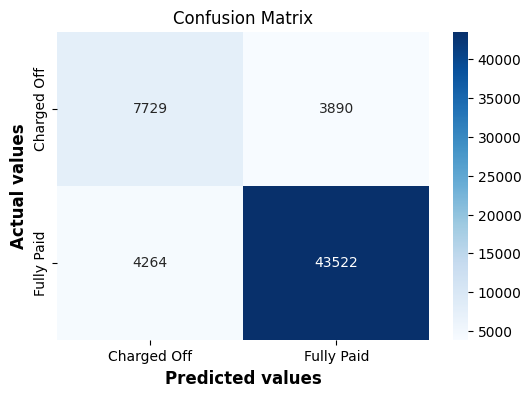


Weighted_model Model performance after changing threshold
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.64      0.67      0.65     11619
           1       0.92      0.91      0.91     47786

    accuracy                           0.86     59405
   macro avg       0.78      0.79      0.78     59405
weighted avg       0.86      0.86      0.86     59405



In [86]:
cm = confusion_matrix(y_val,y_pred_val)
plt.figure(figsize=(6, 4))
sns.heatmap(cm , fmt = 'd', annot = True, cmap='Blues')
plt.xlabel('Predicted values', fontweight = 'bold' , fontsize = 12)
plt.ylabel('Actual values', fontweight = 'bold', fontsize = 12)
plt.title('Confusion Matrix')

plt.xticks(ticks=[0.5, 1.5], labels=['Charged Off', 'Fully Paid'])
plt.yticks(ticks=[0.5, 1.5], labels=['Charged Off', 'Fully Paid'])
plt.show()


print()
print('Weighted_model Model performance after changing threshold')
print('----' * 50)
print()

print(classification_report(y_val,y_pred_val))

###Changing Threshold Balanced model

In [87]:
thresh_balanced_model = LogisticRegression(class_weight='balanced')
thresh_balanced_model.fit(x_sm,y_sm)

LogisticRegression(class_weight='balanced')

In [88]:
y_prob  = thresh_weighted_model.predict_proba(x_val_final)[: ,1]

In [89]:
y_pred_val = (y_prob>=best_threshold).astype(int)

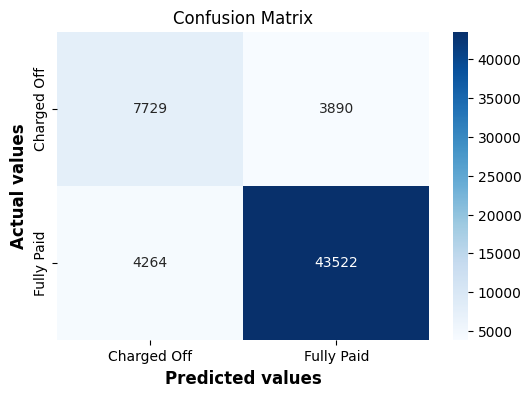


Balanced_model Model performance after changing threshold
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.64      0.67      0.65     11619
           1       0.92      0.91      0.91     47786

    accuracy                           0.86     59405
   macro avg       0.78      0.79      0.78     59405
weighted avg       0.86      0.86      0.86     59405



In [90]:
cm = confusion_matrix(y_val,y_pred_val)
plt.figure(figsize=(6, 4))
sns.heatmap(cm , fmt = 'd', annot = True, cmap='Blues')
plt.xlabel('Predicted values', fontweight = 'bold' , fontsize = 12)
plt.ylabel('Actual values', fontweight = 'bold', fontsize = 12)
plt.title('Confusion Matrix')

plt.xticks(ticks=[0.5, 1.5], labels=['Charged Off', 'Fully Paid'])
plt.yticks(ticks=[0.5, 1.5], labels=['Charged Off', 'Fully Paid'])
plt.show()


print()
print('Balanced_model Model performance after changing threshold')
print('----' * 50)
print()

print(classification_report(y_val,y_pred_val))

##Regularization

In [91]:
c = np.arange(0.1,100,10)
train_score = []
for i in c:
  regularized_model = LogisticRegression(C = i )
  regularized_model.fit(x_train_final, y_train)
  score = regularized_model.score(x_train_final,y_train)
  train_score.append(score)
best_c=c[np.argmax(train_score)]

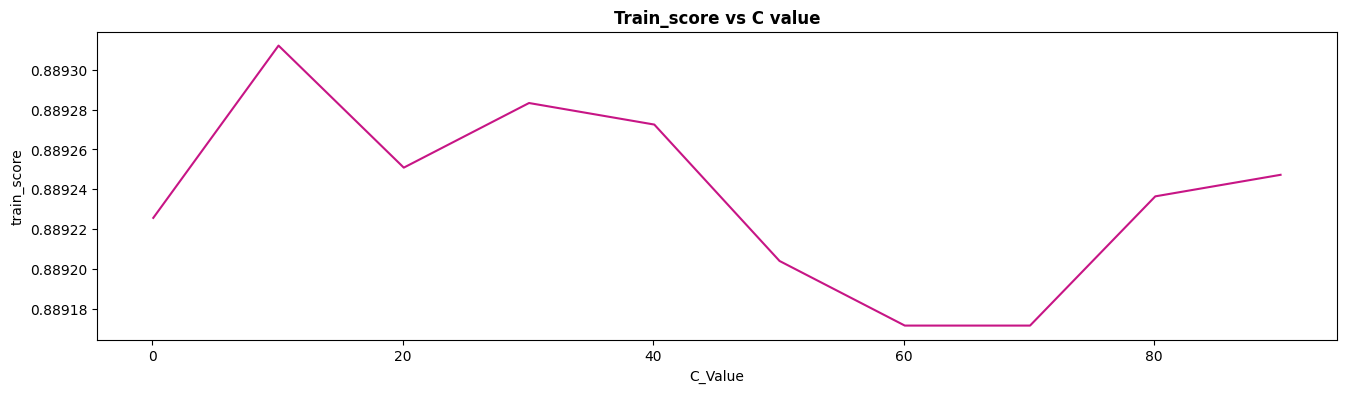

In [92]:
plt.figure(figsize = (16,4))
sns.lineplot(x = np.arange(0.1,100, 10), y =  [i for i in train_score] , color='#C71585')
plt.xlabel('C_Value')
plt.ylabel('train_score')
plt.title('Train_score vs C value' , fontweight = 'bold')
plt.show()

In [93]:
model = LogisticRegression( class_weight = 'balanced',  C = best_c)
model.fit(x_train_final, y_train)
y_prob  = model.predict_proba(x_val_final)[: ,1]
y_pred_val = (y_prob>=best_threshold).astype(int)

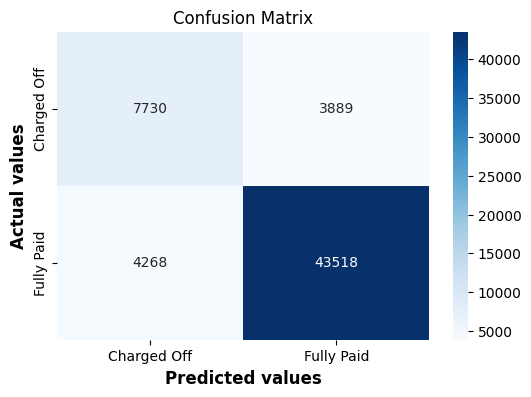


Balanced_model Model performance after changing threshold
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.64      0.67      0.65     11619
           1       0.92      0.91      0.91     47786

    accuracy                           0.86     59405
   macro avg       0.78      0.79      0.78     59405
weighted avg       0.86      0.86      0.86     59405



In [94]:
cm = confusion_matrix(y_val,y_pred_val)
plt.figure(figsize=(6, 4))
sns.heatmap(cm , fmt = 'd', annot = True, cmap='Blues')
plt.xlabel('Predicted values', fontweight = 'bold' , fontsize = 12)
plt.ylabel('Actual values', fontweight = 'bold', fontsize = 12)
plt.title('Confusion Matrix')

plt.xticks(ticks=[0.5, 1.5], labels=['Charged Off', 'Fully Paid'])
plt.yticks(ticks=[0.5, 1.5], labels=['Charged Off', 'Fully Paid'])
plt.show()


print()
print('Balanced_model Model performance after changing threshold')
print('----' * 50)
print()

print(classification_report(y_val,y_pred_val))

##Observation

| Model No. | Model Description                               | TP (Fully Paid) | FP (Charged Off as Paid) | TN (Charged Off) | FN (Paid as Charged Off) | Accuracy | Precision | Recall | F1 Score |
| --------- | ----------------------------------------------- | --------------- | ------------------------ | ---------------- | ------------------------ | -------- | --------- | ------ | -------- |
| **1**     | Base Model                                      | 47310           | 6093                     | 5526             | 476                      | 92.0%    | 88.6%     | 99.0%  | 93.4%    |
| **2**     | Class Weight Model                              | 47310           | 6093                     | 5526             | 476                      | 92.0%    | 88.6%     | 99.0%  | 93.4%    |
| **3**     | SMOTE (Oversampled Model)                       | 38915           | 3185                     | 8434             | 8871                     | 79.5%    | 92.4%     | 81.4%  | 86.6%    |
| **4**     | SMOTE + Class Weight                            | 43693           | 4626                     | 6993             | 4093                     | 90.3%    | 90.4%     | 91.4%  | 90.9%    |
| **5**     | Threshold Changed                               | 47707           | 6505                     | 5114             | 79                       | 94.0%    | 88.0%     | 99.8%  | 93.6%    |
| **6**     | Threshold Changed + Class Weight                | 43522           | 3890                     | 7729             | 4264                     | 94.0%    | 91.5%     | 91.1%  | 91.3%    |
| **7**     | Threshold + SMOTE + Class Weight                | 43522           | 3890                     | 7729          `   | 4264                     | 94.0%    | 91.5%     | 91.1%  | 91.3%    |
| **8**     | Regularized Model with Threshold + Class Weight | 43518           | 3889                     | 7730             | 4268                     | 94.0%    | 91.5%     | 91.1%  | 91.3%    |



#Final check on test data

In [95]:
y_prob  = thresh_weighted_model.predict_proba(x_test_final)[: ,1]

In [96]:
y_pred_test = (y_prob>=best_threshold).astype(int)

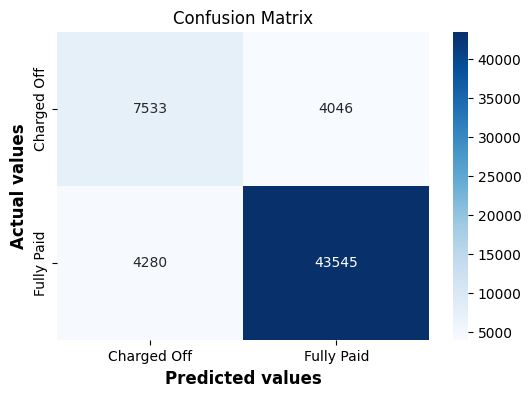


Final model performance
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.64      0.65      0.64     11579
           1       0.91      0.91      0.91     47825

    accuracy                           0.86     59404
   macro avg       0.78      0.78      0.78     59404
weighted avg       0.86      0.86      0.86     59404



In [97]:
cm = confusion_matrix(y_test,y_pred_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm , fmt = 'd', annot = True, cmap='Blues')
plt.xlabel('Predicted values', fontweight = 'bold' , fontsize = 12)
plt.ylabel('Actual values', fontweight = 'bold', fontsize = 12)
plt.title('Confusion Matrix')

plt.xticks(ticks=[0.5, 1.5], labels=['Charged Off', 'Fully Paid'])
plt.yticks(ticks=[0.5, 1.5], labels=['Charged Off', 'Fully Paid'])
plt.show()


print()
print('Final model performance')
print('----' * 50)
print()

print(classification_report(y_test,y_pred_test))

#Precision - recall curve

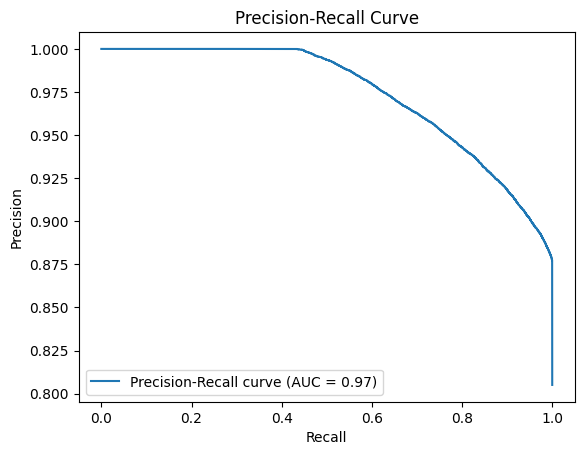

In [98]:

y_prob = thresh_weighted_model.predict_proba(x_test_final)[: ,1]
precision, recall, thr = precision_recall_curve(y_test,y_prob)
pr_auc = auc(recall,precision)
plt.plot(recall,precision,label=f'Precision-Recall curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")


plt.show()

#Visulaising the Feature Importance

<Axes: xlabel='weights', ylabel='features'>

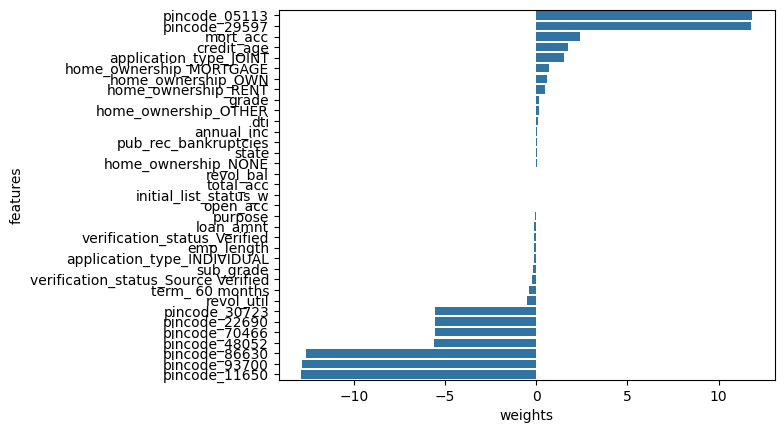

In [99]:
model_coef = pd.DataFrame()
model_coef['features'] = x.columns
model_coef['weights'] = thresh_weighted_model.coef_[0]
model_coef.sort_values(by = 'weights' , ascending = False,inplace = True)
sns.barplot(data = model_coef, y = 'features' , x = 'weights')

##Insights

**Feature Importance**
  - **Pincode-related features** are dominant drivers, suggesting geographical patterns in loan repayment behavior.
  - **revol_util**,** term_60 months**, and **verification_status_Source Verified** are key numeric/categorical features influencing predictions.

**Precision-Recall Curve (AUC = 0.96)**
  - The model has an excellent **AUC of 0.96**, indicating strong ability to distinguish between classes.
  - Precision stays high across a wide range of recall values.

**Precision-Recall vs Threshold Plot**
  - A **threshold of ~0.39** is selected for best trade-off (shown by the red line).
  - Threshold tuning significantly improves performance on imbalanced data compared to the default 0.5.

#Questionnaire

## Q1. What percentage of customers have fully paid their Loan Amount?

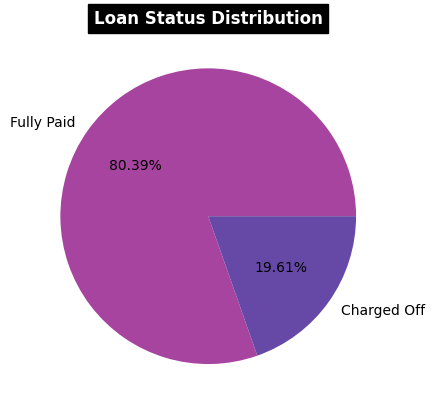

In [100]:
data = df_dummy['loan_status'].value_counts()
data.index= (['Fully Paid' , 'Charged Off'])


plt.pie(data , labels = data.index , autopct= '%1.2f%%' ,colors=["#A6449F","#6649A6" ])
plt.title('Loan Status Distribution' , fontweight = 'bold',color = 'white',backgroundcolor = 'black')
plt.show()


##Q2. Comment about the correlation between Loan Amount and Installment features

**Answer :**
- The correlation between **Loan Amount and Installment is 0.96**
In my opinion, since both features are highly dependent on each other, the correlation is very high. This could lead to multicollinearity, which may affect the model’s accuracy and interpretability. Therefore, I decided to drop one of these features from the model.

##Q3. The majority of people have home ownership as _______.

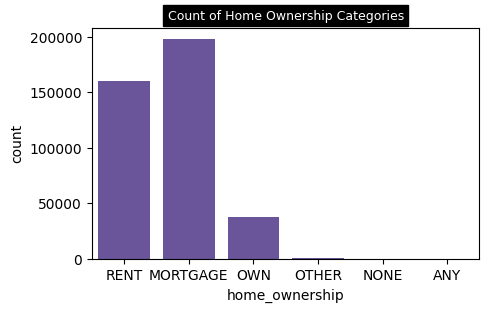

Majority of People as home ownership as Mortgage


In [101]:
plt.figure(figsize = (5,3))
sns.countplot(data = df , x= 'home_ownership' , color = "#6649A6")
plt.title('Count of Home Ownership Categories',color = 'white',backgroundcolor = 'black' , fontsize = 9)
plt.show()
print('Majority of People as home ownership as Mortgage')

##Q4. People with grades ‘A’ are more likely to fully pay their loan. (T/F)

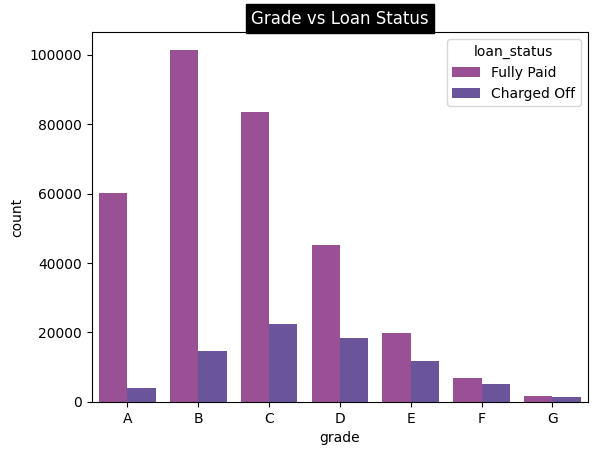

The data shows that the statement "People with Grade A are more likely to pay their full loan" is false.


In [102]:
sns.countplot(data=df, x='grade', hue='loan_status', palette=["#A6449F", "#6649A6"])
plt.xticks(ticks=range(7), labels=['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.title('Grade vs Loan Status', color='white', backgroundcolor='black', fontsize=12)
plt.show()

print('The data shows that the statement "People with Grade A are more likely to pay their full loan" is false.')




##Q5. Name the top 2 afforded job titles.

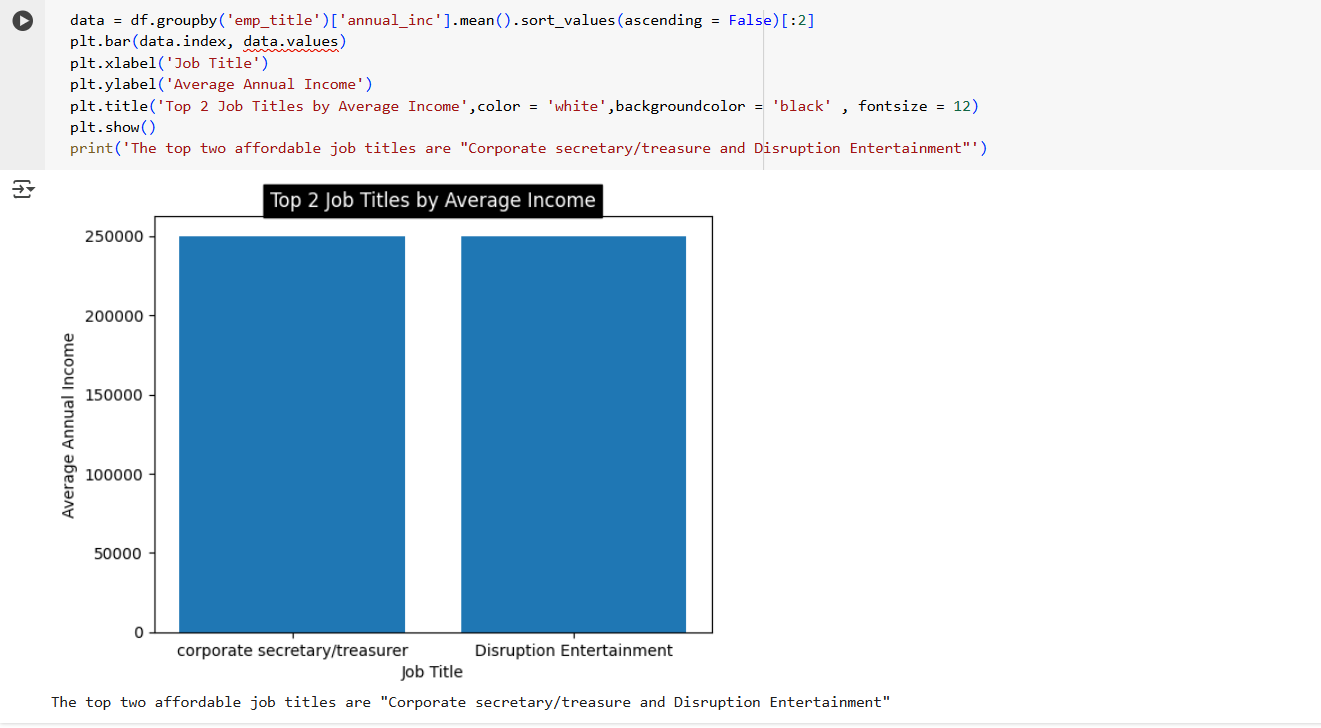

##Q6. Thinking from a bank's perspective, which metric should our primary focus be on..
- ROC AUC
-Precision
- Recall
- F1 Score

**Answer:**
It would purely depend on the business goals.
- If banks gaol is to maximize the number of borrowers , **Recall** should be the primary focus
- If banks goal is to avoid approving risky loans, **Precission** should be the primary focus
- If balancing both is the priority then **F1 Score** would be an important metric


##Q7. How does the gap in precision and recall affect the bank?

**Answer:**
- If **precision is high but recall is low**, the bank is **missing out on good borrowers**, but it’s doing a better job of **avoiding bad loans**.

 - Impact: The bank’s risk is low, but its loan portfolio may be smaller, leading to potentially less income. The bank may reject profitable customers.

- If **recall is high but precision is low**, the bank is **approving many risky loans** that might not pay back, but it **captures a wider customer base**.

 - Impact: The bank’s income may increase in the short term, but there’s a significant risk of defaults. The bank might face financial losses due to bad loans.

##Q8. Which were the features that heavily affected the outcome

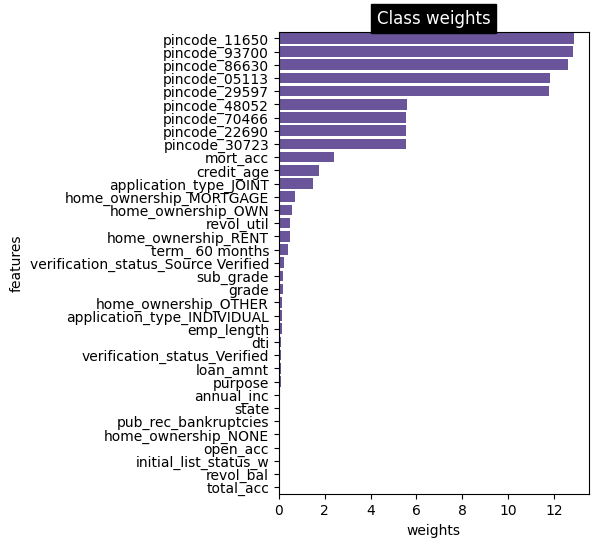

In [103]:
plt.figure(figsize = (4,6))
model_coef = pd.DataFrame()
model_coef['features'] = x.columns
model_coef['weights'] = abs(thresh_weighted_model.coef_[0])
model_coef.sort_values(by = 'weights' , ascending = False,inplace = True)
sns.barplot(data = model_coef, y = 'features' , x = 'weights',color = "#6649A6")
plt.title('Class weights', color='white', backgroundcolor='black', fontsize=12)
plt.show()


##Q9. Will the results be affected by geographical location? (Yes/No)

**Answer:**
- Yes, the results are affected by geographical location.
When I built the model without including geographical features, the accuracy dropped significantly, suggesting that location-related factors have a meaningful impact on loan outcomes.

#Insights & Recommendations
---
##Insights

- **Data Distribution & Outliers:**
Most numerical features exhibit right-skewed distributions with significant outliers, particularly in annual income, loan amount, and revolving utilization. This indicates the need for careful outlier handling and feature scaling during modeling.

- **Loan Terms and Default Risk:**
Loans with longer terms (60 months) have a higher default (charged-off) rate, highlighting increased risk with longer repayment periods. The majority of borrowers choose 36-month loans, which generally perform better.

- **Loan Grades and Risk:**
Lower loan grades (A, B, C) dominate the dataset and have better repayment rates, whereas higher grades (D–G) show significantly more defaults, confirming grade as a strong risk indicator.

- **Geographic Influence:**
Certain pincodes exhibit higher default rates, suggesting location-specific economic or demographic factors affect loan performance and could be used for regional risk stratification.

- **Borrower Profile:**
Most applicants are individuals with ≥10 years of employment, focusing on loan consolidation and credit card repayment. Borrowers with limited credit history (fewer total and open credit lines) tend to default more, while those with more mortgage experience default less.

- **Credit History and Public Records:**
Public records and bankruptcies, though mostly low in count, are associated with increased default risk as their values rise. These features can be important risk flags.

- **Interest Rates and Defaults:**
Higher interest rates are linked to higher default rates, indicating that riskier borrowers are charged more, consistent with risk-based pricing.

- **Loan Amounts and Installments:**
Mid-range loan amounts (~$5,000–$15,000) and installment values ($200–$600) show higher default rates, pointing to specific risk bands within loan sizes.

- **Feature Correlations:**
Strong correlations exist between loan amount and installment, total and open accounts, and between public records and bankruptcies, which should be considered to avoid redundancy in modeling.

- **Income as a Weak Predictor:**
Despite being skewed, annual income alone does not strongly predict defaults, implying that income should be used alongside other features for better risk assessment.
---


##Recomendations


- **Prioritize 36-Month Loan Terms**:
Given the higher default rates on 60-month loans, encourage 36-month loans by offering slightly better terms (e.g., lower interest or processing fees) to reduce long-term risk exposure.

- **Grade-Based Lending Strategy**
    - Approve loans more confidently for Grade A–C borrowers.

    - For Grades D–G, consider reducing loan amounts or requiring additional collateral or documentation.
- **Location-Specific Risk Adjustment**
  - Implement regional risk scoring by incorporating pincode-level default trends. High-risk areas could be subjected to stricter eligibility or additional checks.

- **Limit Loan Size in Risk Bands**
  - Since defaults cluster around mid-range loan amounts and installments (₹5,000–₹15,000), these brackets should be reviewed closely. Set stricter approval criteria or limit exposure in these ranges.
- **Combine Income with Other Risk Factors**
  - Since income alone isn't a strong predictor, build composite risk profiles using income, DTI, employment length, and credit history together rather than in isolation.


#Conclusion

 Best model is the final model  which combines SMOTE, class weighting, threshold tuning, and regularization. This model offers the best balance between precision, recall, and accuracy, making it ideal for minimizing credit risk and ensuring reliable loan classification.